In [ ]:
import pandas as pd
import numpy as np

In [ ]:
post_df=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/Wife_dec22-feb23_profanedropped.csv")
post_df.shape
post_df = post_df.drop_duplicates(subset='id', keep='first')
print(post_df.shape)

(4592, 36)


In [ ]:
len(post_df['author'].unique())

2248

In [ ]:
post_df[post_df['selftext'] == '[removed]'].shape[0]

28

In [ ]:
post_df=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/Wife_dec22-feb23_duplicatedropped.csv")
post_df.shape
post_df=post_df[post_df['subreddit'] == 'wifeshareing']
post_df.shape

In [ ]:
df_throwaway = post_df[post_df['author'].str.contains(r'throw', case=False, na=False)]

# Display the filtered DataFrame
print(df_throwaway.shape[0])
print(len(post_df['author'].unique()))
print(df_throwaway.shape[0]/len(post_df['author'].unique()))

23
2248
0.010231316725978648


In [ ]:
import pandas as pd

# Example dataframe
# df = pd.DataFrame({'author': ['user1', 'throwaway_user', 'thrw_123', 'regularuser', 'thraway_person']})

# Define the list of keywords you want to match
keywords = ['thrw', 'throwaway', 'throw', 'thraway','anon','temp','tmp']

# Create a regex pattern to match any of the keywords (case insensitive)
pattern = '|'.join(keywords)

# Filter the dataframe for rows where the 'author' column matches the pattern
df_throwaway = post_df[post_df['author'].str.contains(pattern, case=False, na=False)]

# Display the filtered dataframe
print(df_throwaway.shape[0])
print(df_throwaway.shape[0]/len(post_df['author'].unique()))

45
0.02001779359430605


In [ ]:
post_df[post_df['selftext']=='[deleted]'].shape[0]

20

In [ ]:
post_df[post_df['selftext']=='[removed]'].shape[0]/post_df.shape[0]

0.006077707835901888

In [ ]:
post_df[(post_df['selftext']=='[deleted]')| (post_df['selftext']=='[removed]')].shape[0]/post_df.shape[0]

0.010452961672473868

In [ ]:
post_df.columns

Index(['Unnamed: 0', 'id', 'created_utc', 'title', 'selftext', 'author',
       'author_flair_text', 'score', 'comments', 'num_comments',
       'num_crossposts', 'edited', 'is_original_content', 'link_flair_text',
       'locked', 'name', 'over_18', 'permalink', 'upvote_ratio', 'url',
       'spoiler', 'stickied', 'subreddit', 'merged', 'social_count',
       'normalized_mentions', 'link', 'found_link', 'text_with_mentions',
       'social_media', 'social_media_mentions', 'trading', 'lemmatized_text',
       'filtered_merged'],
      dtype='object')

In [ ]:
import pandas as pd

# Example dataframe
# df = pd.DataFrame({'author': ['user1', 'throwaway_user', 'thrw_123', 'regularuser', 'thraway_person']})

# Define the list of keywords you want to match
keywords = ['phone']

# Create a regex pattern to match any of the keywords (case insensitive)
pattern = '|'.join(keywords)

# Filter the dataframe for rows where the 'author' column matches the pattern
df_phone = post_df[post_df['merged'].str.contains(pattern, case=False, na=False)]

# Display the filtered dataframe
print(df_phone.shape[0])
#print(df_throwaway.shape[0]/len(post_df['author'].unique()))

17


In [ ]:
df_phone.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2324phone.csv")


In [ ]:
consent_words = ['leak', 'eleak','rape', 'hack','hacker','access','voyeur','hidden camera', 'ex','unaware','She is not agree','do not know', 'identify',
                 'who','porn fake','pushing her boundaries','password']
threshold = 80

# Function to check if any word in the text matches any correct word
def check_match(text, consent_words, threshold):
    words = text.split()  # Split the text into words
    for word in words:
        # Check if there is any match with a similarity score above the threshold
        best_match = process.extractOne(word, consent_words)
        if best_match and best_match[1] >= threshold:
            return 1  # If a match is found, return 1
    return 0  # No match found

# Apply the function to each row in the DataFrame
post_df['not_consent'] = post_df['filtered_merged'].apply(lambda x: check_match(x, consent_words, threshold))

# Output the DataFrame with the new 'match' column

NameError: name 'process' is not defined

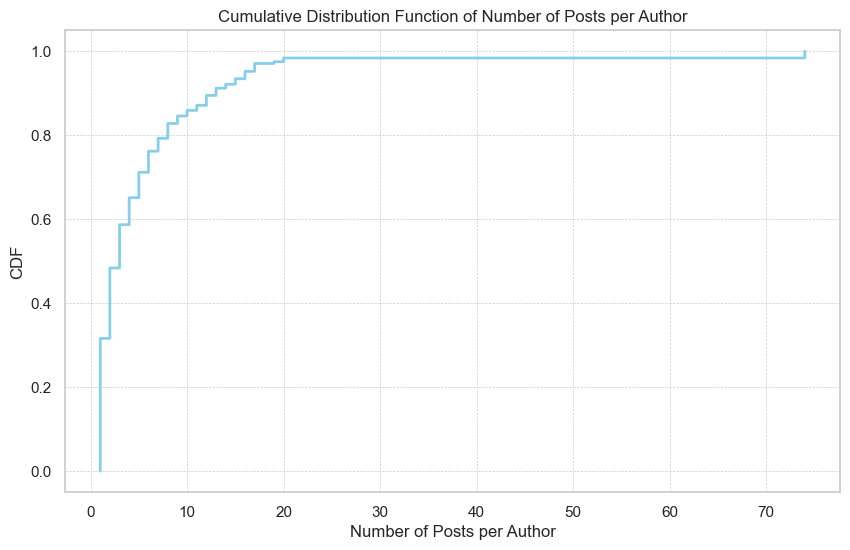

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Example DataFrame (replace this with your actual DataFrame)

df = post_df[(post_df['selftext']!='[deleted]')& (post_df['selftext']!='[removed]')]

# Count the number of posts per author
post_counts = df['author'].value_counts()

# Sort the counts and calculate the CDF
sorted_counts = post_counts.sort_values()
cdf = sorted_counts.cumsum() / sorted_counts.sum()

# Plotting the CDF
plt.figure(figsize=(10, 6))
plt.step(sorted_counts.sort_values(), cdf, where='post', color='skyblue', linestyle='-', linewidth=2)
plt.xlabel('Number of Posts per Author')
plt.ylabel('CDF')
plt.title('Cumulative Distribution Function of Number of Posts per Author')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)
plt.show()


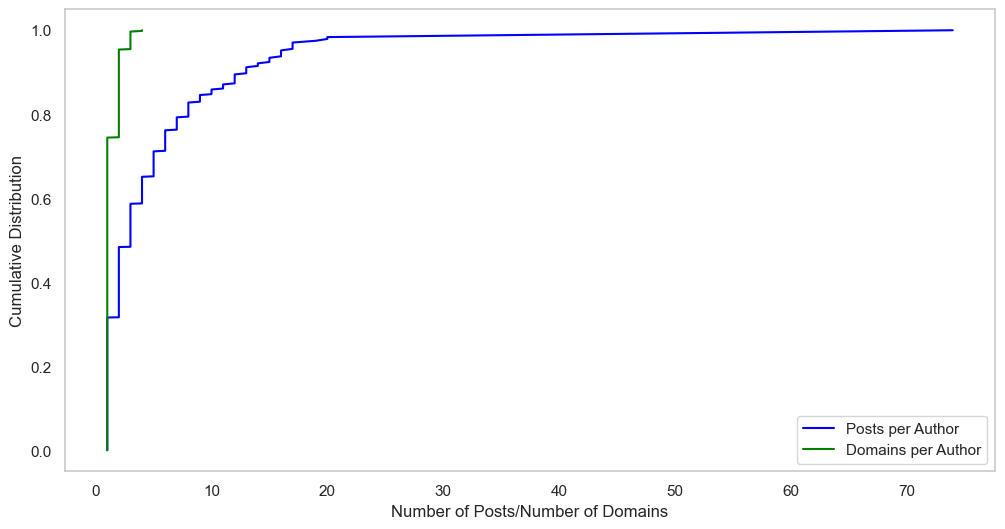

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame (replace this with your actual DataFrame)
# df = pd.read_csv('your_data.csv')  # Example of reading the data

# Count the number of posts per author
posts_per_author = df['author'].value_counts()

# Count the number of unique domains per author
domains_per_author = df.groupby('author')['domain'].nunique()

# Convert to Pandas Series for sorting
posts_series = pd.Series(posts_per_author)
domains_series = pd.Series(domains_per_author)

# Prepare data for CDF plots
posts_sorted = posts_series.sort_values()
domains_sorted = domains_series.sort_values()

# Compute CDF values
posts_cdf_y = posts_sorted.cumsum() / posts_sorted.sum()
domains_cdf_y = domains_sorted.cumsum() / domains_sorted.sum()

# Plotting
plt.figure(figsize=(12, 6))

# Plot CDF for number of posts per author
plt.plot(posts_sorted.values, posts_cdf_y, label='Posts per Author', color='blue')

# Plot CDF for number of domains per author
plt.plot(domains_sorted.values, domains_cdf_y, label='Domains per Author', color='green')

# Labeling
plt.xlabel('Number of Posts/Number of Domains')
plt.ylabel('Cumulative Distribution')
#plt.title('CDF of Number of Posts and Domains per Author')
plt.legend()

# Display plot
plt.grid(False)
plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/24_posts_domain_peruser.png", bbox_inches='tight', format="png", dpi=800)
plt.show()


In [ ]:
post_author=post_df[post_df['author'] != '[deleted]']

In [ ]:
total_posts = post_author.groupby('author')['created_utc'].count()

total_posts = total_posts.sort_values(ascending=False)

# Print the sorted Series
#print(total_posts)
total_posts_df = total_posts.rename('total_posts').reset_index()

# Display the DataFrame with the assigned column name
print(total_posts_df)

                  author  total_posts
0      INDIANCUCKCOUPLE_           74
1     Suitable_Throat912           20
2     Livid_Molasses2169           20
3             yur1_b01ka           19
4              Radcock19           19
...                  ...          ...
2246       One_Lynx_6730            1
2247          OneDay1312            1
2248            One-Job1            1
2249          On_Point22            1
2250              zunna7            1

[2251 rows x 2 columns]


In [ ]:
total_posts[total_posts == 1].shape[0]/total_posts.shape[0]

0.6410484229231452

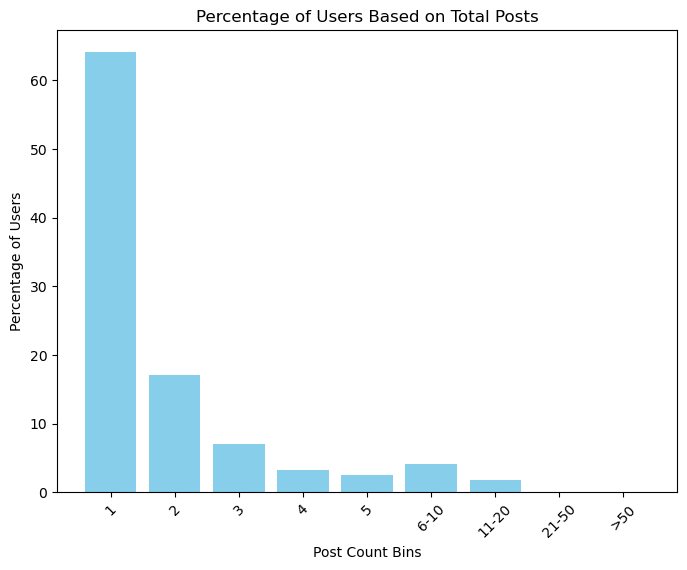

In [ ]:
bins = [0,1, 2, 3, 4, 5, 10, 20, 50, 5000]  # Modify this according to your needs
labels = ['1', '2', '3', '4', '5', '6-10', '11-20', '21-50', '>50']

# Bin the total_posts into the defined bins
total_posts_binned = pd.cut(total_posts, bins=bins, labels=labels, include_lowest=True)

# Count the number of occurrences in each bin
bin_counts = total_posts_binned.value_counts().sort_index()

# Convert counts to percentages
bin_percentages = (bin_counts / bin_counts.sum()) * 100

# Plot the percentage of users in each bin
plt.figure(figsize=(8, 6))
plt.bar(bin_percentages.index, bin_percentages.values, color='skyblue')
plt.title('Percentage of Users Based on Total Posts')
plt.xlabel('Post Count Bins')
plt.ylabel('Percentage of Users')
plt.xticks(rotation=45)
plt.grid(False)
plt.show()

In [ ]:
import pandas as pd

# Convert 'created_utc' to datetime if it's not already in datetime format
post_author['created_utc'] = pd.to_datetime(post_author['created_utc'], format='%d/%m/%Y %H:%M')

# Extract the date from the 'created_utc' column
post_author['date'] = post_author['created_utc'].dt.date

# Group by  author and 'date' and count the number of posts
daily_posts = post_author.groupby(['author', 'date']).size().reset_index(name='daily_post_count')

# Print the resulting dataframe to see the counts
daily_posts = daily_posts.sort_values(by='daily_post_count', ascending=False)
print(daily_posts.head(10))

                 author        date  daily_post_count
887   INDIANCUCKCOUPLE_  2022-12-17                43
886   INDIANCUCKCOUPLE_  2022-12-16                18
3624         yur1_b01ka  2023-01-07                12
1667          Radcock19  2022-12-24                10
753            Funmom57  2022-12-11                 9
2314         boyka-yur1  2023-01-04                 7
888   INDIANCUCKCOUPLE_  2022-12-18                 7
3623         yur1_b01ka  2023-01-06                 7
1838          Spitz2425  2023-01-16                 6
775   Global-Analyst607  2023-01-10                 6


<Figure size 1000x600 with 0 Axes>

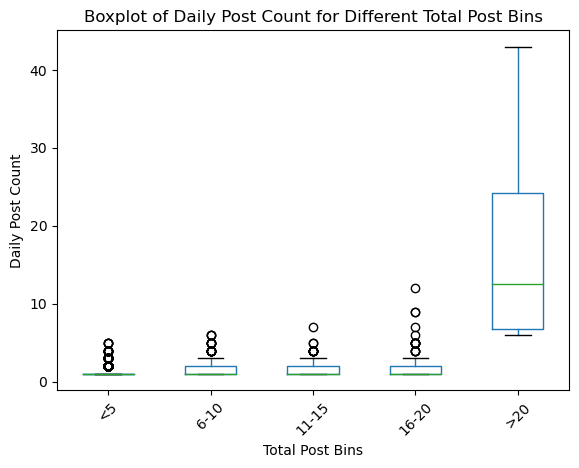

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming total_posts_df has 'author' and 'total_posts', and daily_posts has 'author' and 'daily_post_count'

# Step 1: Define the bins for total_posts
bins = [0, 5, 10, 15, 20, 100]
labels = ['<5', '6-10', '11-15', '16-20', '>20']

# Step 2: Bin the total_posts column
total_posts_df['bins'] = pd.cut(total_posts_df['total_posts'], bins=bins, labels=labels, include_lowest=True)

# Step 3: Merge total_posts_df with daily_posts on 'author'
merged_df = pd.merge(total_posts_df, daily_posts, on='author')

# Step 4: Plot boxplot of daily_post_count for each bin
plt.figure(figsize=(10, 6))
merged_df.boxplot(column='daily_post_count', by='bins', grid=False)
plt.title('Boxplot of Daily Post Count for Different Total Post Bins')
plt.suptitle('')  # Suppress the automatic 'Boxplot grouped by' title
plt.xlabel('Total Post Bins')
plt.ylabel('Daily Post Count')
plt.xticks(rotation=45)
plt.show()

<Figure size 1000x600 with 0 Axes>

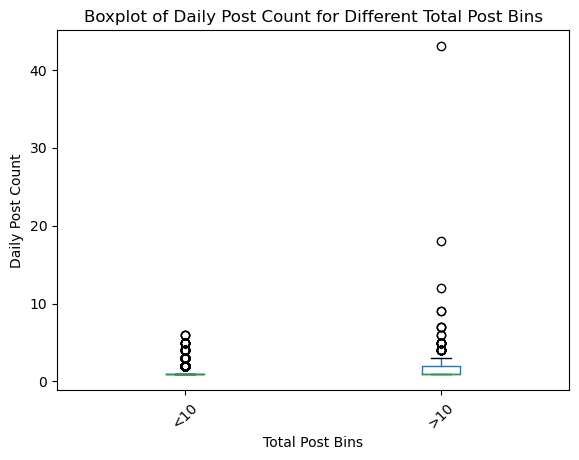

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming total_posts_df has 'author' and 'total_posts', and daily_posts has 'author' and 'daily_post_count'

# Step 1: Define the bins for total_posts
bins = [0, 10, 5000]
labels = ['<10', '>10']

# Step 2: Bin the total_posts column
total_posts_df['bins'] = pd.cut(total_posts_df['total_posts'], bins=bins, labels=labels, include_lowest=True)

# Step 3: Merge total_posts_df with daily_posts on 'author'
merged_df = pd.merge(total_posts_df, daily_posts, on='author')

# Step 4: Plot boxplot of daily_post_count for each bin
plt.figure(figsize=(10, 6))
merged_df.boxplot(column='daily_post_count', by='bins', grid=False)
plt.title('Boxplot of Daily Post Count for Different Total Post Bins')
plt.suptitle('')  # Suppress the automatic 'Boxplot grouped by' title
plt.xlabel('Total Post Bins')
plt.ylabel('Daily Post Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
for label in labels:
    bin_data = merged_df[merged_df['bins'] == label]['daily_post_count']

    median = bin_data.median()
    q1 = bin_data.quantile(0.25)
    q3 = bin_data.quantile(0.75)
    iqr = q3 - q1
    min_val = bin_data.min()
    max_val = bin_data.max()

    # Outliers: values outside 1.5 * IQR
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    outliers = bin_data[(bin_data < lower_bound) | (bin_data > upper_bound)]

    # Print statistics
    print(f"Statistics for {label} posts bin:")
    print(f"Median: {median}")
    print(f"IQR: {q1} to {q3} (IQR = {iqr})")
    print(f"Range: {min_val} to {max_val}")
    print(f"Number of Outliers: {len(outliers)}")
    print(f"Outliers: {outliers.values}\n")


Statistics for <10 posts bin:
Median: 1.0
IQR: 1.0 to 1.0 (IQR = 0.0)
Range: 1 to 6
Number of Outliers: 470
Outliers: [4 2 2 2 2 2 4 2 3 3 2 2 2 2 2 3 3 2 2 5 5 3 3 2 3 3 2 4 4 3 2 2 2 6 2 2 6
 2 2 3 2 4 2 5 2 2 2 2 2 2 2 2 2 2 3 2 2 2 2 2 2 2 2 2 2 2 3 2 3 2 2 3 3 2
 2 2 2 2 2 3 3 4 4 2 2 6 2 2 2 3 2 4 2 2 2 5 4 2 3 2 3 2 2 2 5 3 3 5 4 2 2
 2 3 2 2 2 2 3 3 2 3 2 2 2 2 2 2 5 2 5 2 2 2 4 3 4 2 2 2 2 2 3 3 2 3 2 2 5
 2 4 3 3 2 2 5 3 2 2 2 4 2 2 2 2 2 2 2 4 2 3 3 2 2 2 3 4 3 3 2 4 4 2 2 2 2
 3 2 2 3 2 4 2 4 4 3 3 2 2 2 3 3 4 3 4 2 3 3 4 2 2 2 2 4 2 4 4 3 3 4 2 2 2
 3 2 2 2 2 2 2 2 2 2 2 3 3 3 3 2 3 2 2 2 3 3 2 2 2 2 2 3 2 2 3 2 2 3 3 3 2
 2 3 2 3 2 2 2 3 3 2 2 2 3 3 3 3 2 2 3 3 2 2 3 3 2 2 2 2 2 3 2 2 2 3 2 2 3
 2 3 2 2 3 3 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 

<Figure size 1000x600 with 0 Axes>

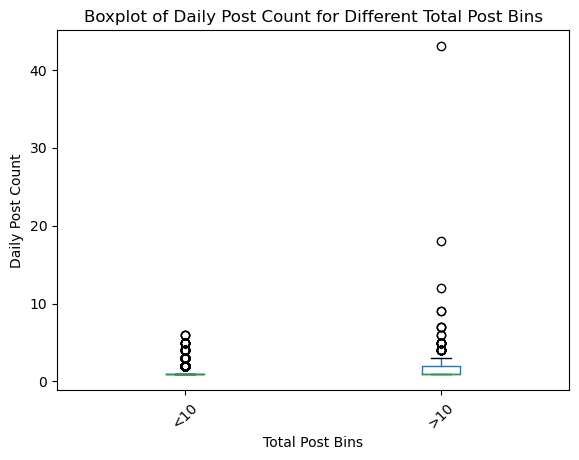

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming total_posts_df has 'author' and 'total_posts', and daily_posts has 'author' and 'daily_post_count'
total_posts_df1=total_posts_df[total_posts_df['total_posts']>1]
# Step 1: Define the bins for total_posts
bins = [0, 10, 5000]
labels = ['<10', '>10']

# Step 2: Bin the total_posts column
total_posts_df['bins'] = pd.cut(total_posts_df['total_posts'], bins=bins, labels=labels, include_lowest=True)

# Step 3: Merge total_posts_df with daily_posts on 'author'
merged_df = pd.merge(total_posts_df, daily_posts, on='author')

# Step 4: Plot boxplot of daily_post_count for each bin
plt.figure(figsize=(10, 6))
merged_df.boxplot(column='daily_post_count', by='bins', grid=False)
plt.title('Boxplot of Daily Post Count for Different Total Post Bins')
plt.suptitle('')  # Suppress the automatic 'Boxplot grouped by' title
plt.xlabel('Total Post Bins')
plt.ylabel('Daily Post Count')
plt.xticks(rotation=45)
plt.show()

In [ ]:
import matplotlib.pyplot as plt
active_days = daily_posts['author'].value_counts()

# Calculate the average active days per user
active_days_df = active_days.rename('number_active_days').reset_index()

# Rename the 'index' column to 'author'
active_days_df = active_days_df.rename(columns={'index': 'author'})

# Display the resulting DataFrame
print(active_days_df)

                   author  number_active_days
0                itugwell                  15
1            jack_rite445                  13
2               TheViews7                  13
3           HotFlirtyWife                  13
4          Much-Milk-8804                  12
...                   ...                 ...
2246       wickerchidaddy                   1
2247  whoevenreadsthis000                   1
2248       wetgoddesswife                   1
2249          wendell1981                   1
2250               zunna7                   1

[2251 rows x 2 columns]


/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_55603/1335378096.py:6: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(daily_posts['daily_post_count'], shade=True)


<Axes: xlabel='daily_post_count', ylabel='Density'>

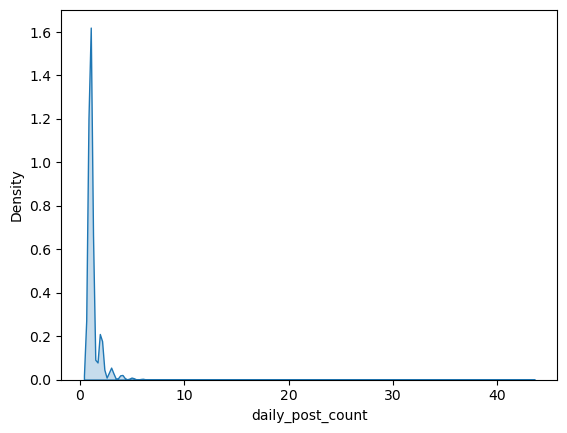

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visual inspection using box plots


sns.kdeplot(daily_posts['daily_post_count'], shade=True)

In [ ]:
merged_df = pd.merge(total_posts_df, active_days_df, on='author')

# Step 2: Calculate avg_posts
merged_df['avg_posts'] = merged_df['total_posts'] / merged_df['number_active_days']
print(merged_df)



                  author  total_posts bins  number_active_days  avg_posts
0      INDIANCUCKCOUPLE_           74  >20                   4  18.500000
1     Suitable_Throat912           20  <20                  12   1.666667
2     Livid_Molasses2169           20  <20                   9   2.222222
3             yur1_b01ka           19  <20                   2   9.500000
4              Radcock19           19  <20                   4   4.750000
...                  ...          ...  ...                 ...        ...
2246       One_Lynx_6730            1   <5                   1   1.000000
2247          OneDay1312            1   <5                   1   1.000000
2248            One-Job1            1   <5                   1   1.000000
2249          On_Point22            1   <5                   1   1.000000
2250              zunna7            1   <5                   1   1.000000

[2251 rows x 5 columns]


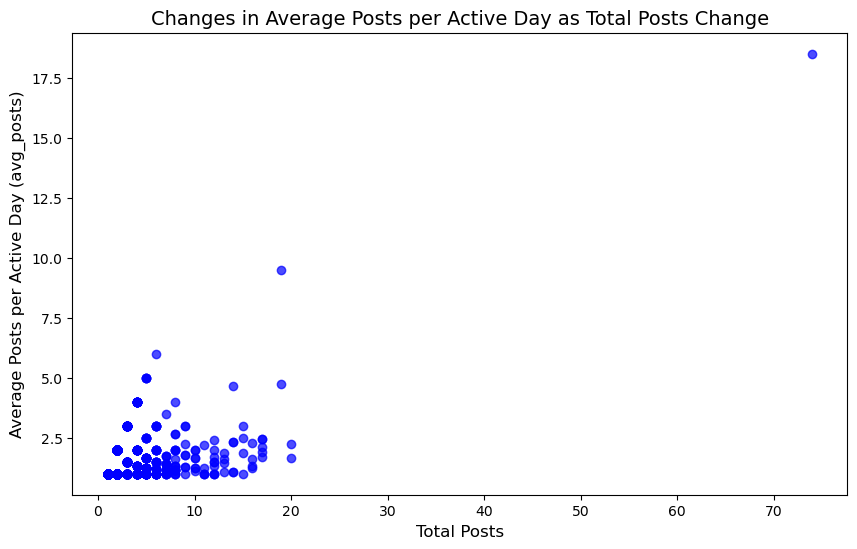

In [ ]:
plt.figure(figsize=(10, 6))
plt.scatter(merged_df['total_posts'], merged_df['avg_posts'], color='blue', alpha=0.7)

# Adding titles and labels
plt.title('Changes in Average Posts per Active Day as Total Posts Change', fontsize=14)
plt.xlabel('Total Posts', fontsize=12)
plt.ylabel('Average Posts per Active Day (avg_posts)', fontsize=12)

# Display the plot
plt.grid(False)
plt.show()

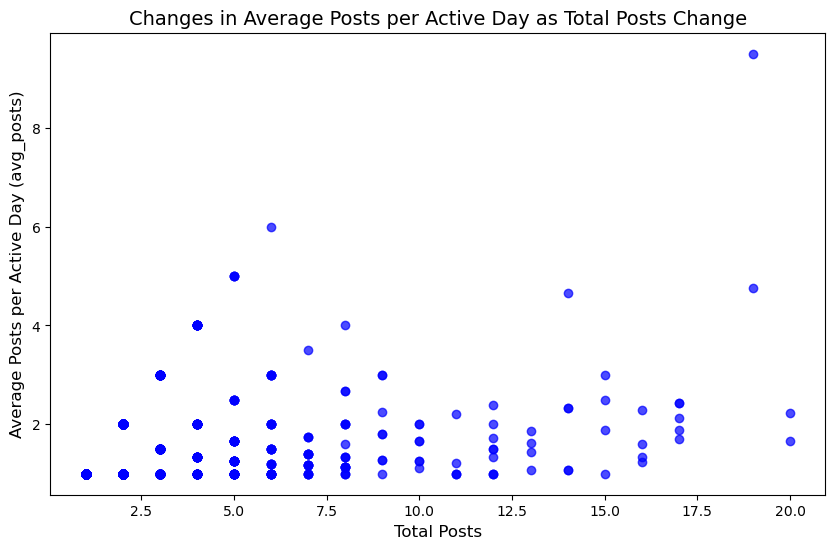

In [ ]:
merged_df1= merged_df[merged_df['total_posts']<30]

plt.figure(figsize=(10, 6))
plt.scatter(merged_df1['total_posts'], merged_df1['avg_posts'], color='blue', alpha=0.7)

# Adding titles and labels
plt.title('Changes in Average Posts per Active Day as Total Posts Change', fontsize=14)
plt.xlabel('Total Posts', fontsize=12)
plt.ylabel('Average Posts per Active Day (avg_posts)', fontsize=12)

# Display the plot
plt.grid(False)
plt.show()

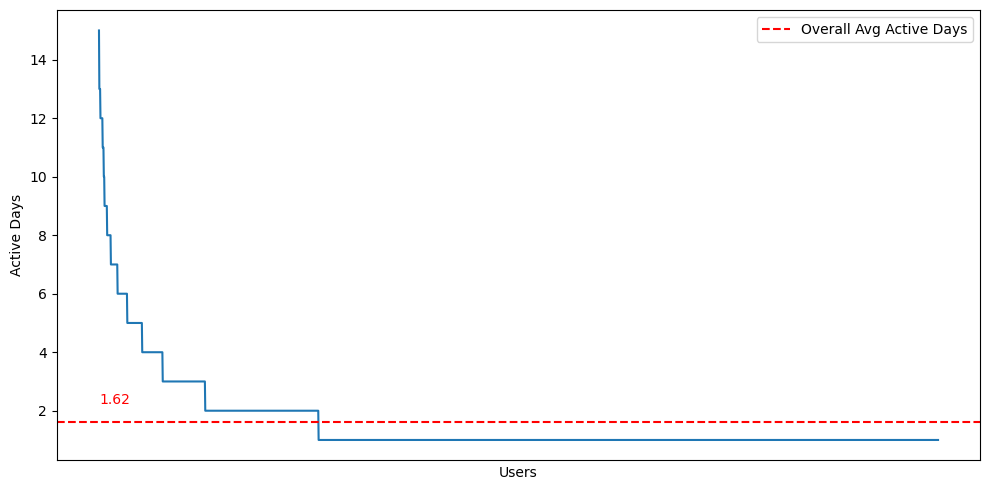

In [ ]:
avg_active_days = active_days.mean()

# Create a DataFrame for plotting
avg_active_days_df = active_days.reset_index()
avg_active_days_df.columns = ['user', 'active_days']

# Plotting
plt.figure(figsize=(10, 5))
plt.plot(avg_active_days_df['user'], avg_active_days_df['active_days'])
#plt.plot(avg_active_days_df['user'], avg_active_days_df['active_days'], marker='o')
#plt.title('Average Active Days per User')
plt.xlabel('Users')
plt.ylabel('Active Days')
plt.xticks([])
#plt.grid()
plt.axhline(y=avg_active_days, color='r', linestyle='--', label='Overall Avg Active Days')

offset = 0.5  # Adjust this value to control the vertical offset
plt.text(0, avg_active_days + offset, f'{avg_active_days:.2f}', color='r', va='bottom', ha='left')



plt.legend()
plt.tight_layout()
#plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/author_avg_active_days.png", bbox_inches='tight',format="png", dpi=800)
plt.show()

# Matching posts

In [1]:
df1=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/Wife_dec22-feb23_duplicatedropped.csv")
df2=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/90_23_24similar_posts_df.csv")
df2 = df2.merge(df1[['id', 'author']], on='id', how='left')
df2['word_count'] = df2['filtered_merged'].apply(lambda x: len(x.split()))
df2=df2[df2['word_count']>3]
df2['matching_posts_count'] = df2['similar_post_ids'].apply(lambda x: len(x.split(',')))
df2=df2[df2['matching_posts_count']!=0]

NameError: name 'pd' is not defined

In [ ]:
import ast
import pandas as pd
import ast


import ast

# Convert similar_post_ids to list format if it's a comma-separated string
df2['similar_post_ids'] = df2['similar_post_ids'].apply(lambda x: x.split(','))

# Create a dictionary to map ids to authors
id_to_author = df2.set_index('id')['author'].to_dict()

# Function to get unique matching authors
def get_matching_authors(row):
    current_author = row['author']
    # Use a set comprehension to collect matching authors from similar_post_ids
    matching_authors = {
        id_to_author[mid] for mid in row['similar_post_ids']
        if mid in id_to_author and id_to_author[mid] != current_author
    }
    return list(matching_authors) if matching_authors else None

# Apply the function to create the new column
df2['matching_other_authors'] = df2.apply(get_matching_authors, axis=1)
df2['matching_other_authors_count'] = df2['matching_other_authors'].apply(lambda x: len(x) if x else 0)
df2.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/90_23_24len_similar_posts_df.csv")


In [ ]:
df=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/Wife_dec22-feb23_duplicatedropped.csv")
df['filtered_merged_count'] = df['filtered_merged'].apply(lambda x: len(x.split()))
df.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/Wife_dec22-feb23_duplicatedropped.csv")

In [ ]:
df1=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/90_23_24len_similar_posts_df.csv")
print(df1.shape[0])
print(df1.shape[0]/df.shape[0])
df2=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/95_23_24len_similar_posts_df.csv")
print(df2.shape[0])
print(df2.shape[0]/df.shape[0])

df3=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/98_23_24len_similar_posts_df.csv")
print(df3.shape[0])
print(df3.shape[0]/df.shape[0])


729
0.18871343515402536
690
0.1786176546725343
688
0.17809992234015015


In [ ]:
df=df[df['filtered_merged_count']>3]

In [ ]:
deleted_count90 = df1[df1['author'] == "[deleted]"].shape[0]
deleted_count95 = df2[df2['author'] == "[deleted]"].shape[0]
deleted_count98 = df3[df3['author'] == "[deleted]"].shape[0]
# Print the result
print("Th=90=",deleted_count90)
print("Th=95=",deleted_count95)
print("Th=98=",deleted_count98)
print("Th=90=",deleted_count90/df1.shape[0])
print("Th=95=",deleted_count95/df2.shape[0])
print("Th=98=",deleted_count98/df3.shape[0])

Th=90= 0
Th=95= 0
Th=98= 0
Th=90= 0.0
Th=95= 0.0
Th=98= 0.0


<ipython-input-3-f4f2a6a74c64>:57: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Threshold', y='Matching Posts Count', data=combined_df, palette=palette, flierprops=flierprops)


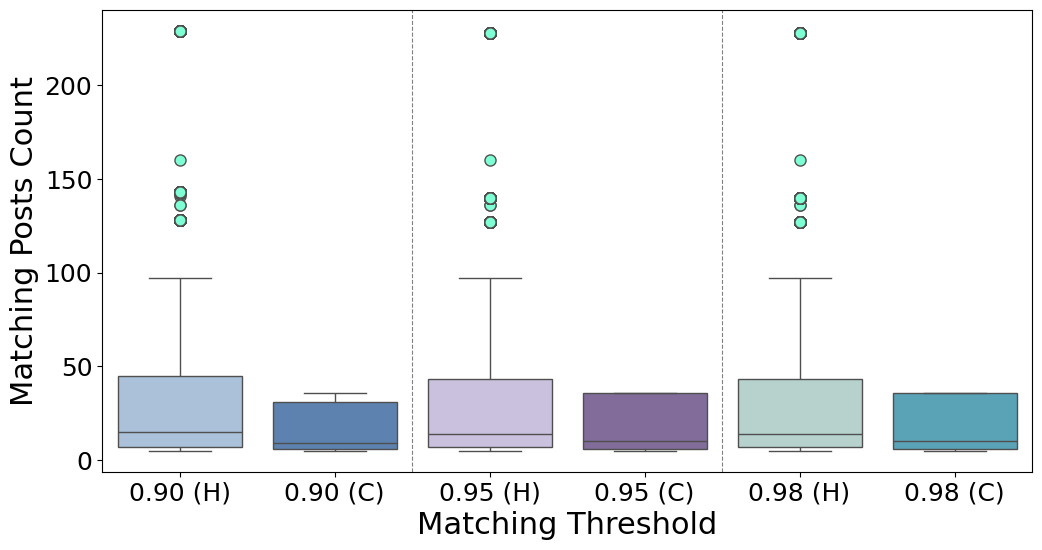

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Load the current datasets
df_current_90 = pd.read_csv("90_23_24len_similar_posts_df.csv")
df_current_95 = pd.read_csv("95_23_24len_similar_posts_df.csv")
df_current_98 = pd.read_csv("98_23_24len_similar_posts_df.csv")

# Load the historical datasets
df_historical_90 = pd.read_csv("/content/90_len_similar_posts_df.csv")
df_historical_95 = pd.read_csv("/content/95_len_similar_posts_df.csv")
df_historical_98 = pd.read_csv("/content/98_len_similar_posts_df.csv")

# Prepare the data
data = {
    'Matching Posts Count': [],
    'Threshold': []
}

# Function to add data to the combined DataFrame with filtering for repeats >= 5
def add_data(df, threshold, is_historical):
    # Filter for posts with 5 or more matches
    df_filtered = df[df['matching_posts_count'] >= 5]
    scale = 1  # Adjust scale if needed for historical
    data['Matching Posts Count'].extend(df_filtered['matching_posts_count'] / scale)
    data['Threshold'].extend([f"{threshold} ({'H' if is_historical else 'C'})"] * len(df_filtered))

# Add current and historical data with filtering
add_data(df_historical_90, '0.90', True)
add_data(df_current_90, '0.90', False)
add_data(df_historical_95, '0.95', True)
add_data(df_current_95, '0.95', False)
add_data(df_historical_98, '0.98', True)
add_data(df_current_98, '0.98', False)

# Convert to DataFrame
combined_df = pd.DataFrame(data)

# Create the figure and axis
plt.figure(figsize=(12, 6))

# Define a color palette with contrasting shades for each threshold
palette = {
    '0.90 (H)': '#a3c1e1',  # light teal for historical 0.90
    '0.90 (C)': '#4f81bd',     # slightly darker teal for current 0.90
    '0.95 (H)': '#c7bce2',  # light purple for historical 0.95
    '0.95 (C)': '#8064a2',     # darker purple for current 0.95
    '0.98 (H)': '#b2d7d0',  # light blue for historical 0.98
    '0.98 (C)': '#4bacc6'      # darker blue for current 0.98
}

# Custom properties for the outliers
flierprops = dict(marker='o', markerfacecolor='aquamarine', markersize=8, linestyle='none')

# Create boxplot with colors and customized outliers
sns.boxplot(x='Threshold', y='Matching Posts Count', data=combined_df, palette=palette, flierprops=flierprops)

# Set labels with larger fonts
plt.xlabel('Matching Threshold', fontsize=22)
plt.ylabel('Matching Posts Count', fontsize=22)

# Increase the size of the tick labels
plt.xticks(fontsize=18)
plt.yticks(fontsize=18)

# Remove the grid
plt.grid(False)

# Adding vertical dashed lines to separate the threshold groups
plt.axvline(1.5, color='gray', linestyle='--', linewidth=0.8)  # between 0.90 and 0.95
plt.axvline(3.5, color='gray', linestyle='--', linewidth=0.8)  # between 0.95 and 0.98

# Create a custom legend and place it outside on the right
handles = [plt.Line2D([0], [0], color=color, lw=4) for color in palette.values()]
labels = list(palette.keys())
# Uncomment the following line to show the legend outside the plot area
# plt.legend(handles, labels, title="Thresholds", title_fontsize='13', fontsize='12', loc='center left', bbox_to_anchor=(1, 0.5))

# Save the figure
plt.savefig("24_count_matchingposts.pdf", bbox_inches='tight', format="pdf", dpi=800)
plt.show()


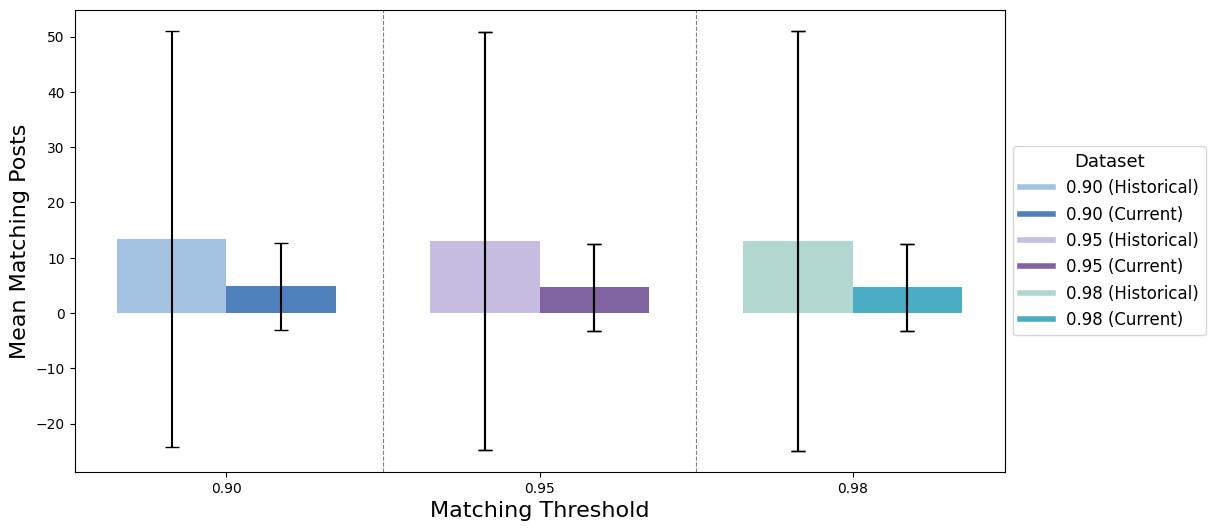

In [30]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# Load the current datasets
df_current_90 = pd.read_csv("90_23_24len_similar_posts_df.csv")
df_current_95 = pd.read_csv("95_23_24len_similar_posts_df.csv")
df_current_98 = pd.read_csv("98_23_24len_similar_posts_df.csv")

# Load the historical datasets
df_historical_90 = pd.read_csv("/content/90_len_similar_posts_df.csv")
df_historical_95 = pd.read_csv("/content/95_len_similar_posts_df.csv")
df_historical_98 = pd.read_csv("/content/98_len_similar_posts_df.csv")

# Function to calculate mean and standard deviation
def calculate_stats(df):
    mean = np.mean(df['matching_posts_count'])
    std_dev = np.std(df['matching_posts_count'])
    return mean, std_dev

# Calculate means and standard deviations
means = []
std_devs = []
thresholds = ['0.90', '0.95', '0.98']
datasets = [df_historical_90, df_current_90,
            df_historical_95, df_current_95,
            df_historical_98, df_current_98]

for df in datasets:
    mean, std_dev = calculate_stats(df)
    means.append(mean)
    std_devs.append(std_dev)

# Prepare data for plotting
x = np.arange(len(thresholds))
width = 0.35  # width of the bars

# Separate historical and current means and std deviations
hist_means = means[0::2]
hist_std_devs = std_devs[0::2]
curr_means = means[1::2]
curr_std_devs = std_devs[1::2]

# Define the color palette
palette = {
    '0.90 (Historical)': '#a3c1e1',  # light teal for historical 0.90
    '0.90 (Current)': '#4f81bd',     # slightly darker teal for current 0.90
    '0.95 (Historical)': '#c7bce2',  # light purple for historical 0.95
    '0.95 (Current)': '#8064a2',     # darker purple for current 0.95
    '0.98 (Historical)': '#b2d7d0',  # light blue for historical 0.98
    '0.98 (Current)': '#4bacc6'      # darker blue for current 0.98
}

# Plotting
fig, ax = plt.subplots(figsize=(12, 6))

# Historical bars
ax.bar(x - width/2, hist_means, width, yerr=hist_std_devs,
       label='0.90 (Historical)', color=palette['0.90 (Historical)'], capsize=5)
ax.bar(x[1] - width/2, hist_means[1], width, yerr=hist_std_devs[1],
       label='0.95 (Historical)', color=palette['0.95 (Historical)'], capsize=5)
ax.bar(x[2] - width/2, hist_means[2], width, yerr=hist_std_devs[2],
       label='0.98 (Historical)', color=palette['0.98 (Historical)'], capsize=5)

# Current bars
ax.bar(x + width/2, curr_means, width, yerr=curr_std_devs,
       label='0.90 (Current)', color=palette['0.90 (Current)'], capsize=5)
ax.bar(x[1] + width/2, curr_means[1], width, yerr=curr_std_devs[1],
       label='0.95 (Current)', color=palette['0.95 (Current)'], capsize=5)
ax.bar(x[2] + width/2, curr_means[2], width, yerr=curr_std_devs[2],
       label='0.98 (Current)', color=palette['0.98 (Current)'], capsize=5)

# Set labels and ticks
ax.set_xlabel('Matching Threshold', fontsize=16)
ax.set_ylabel('Mean Matching Posts', fontsize=16)
ax.set_xticks(x)
ax.set_xticklabels(thresholds)

# Adding vertical dashed lines to separate the threshold groups
for i in range(1, len(thresholds)):
    plt.axvline(i - 0.5, color='gray', linestyle='--', linewidth=0.8)

# Custom legend outside the plot on the right side
handles = [plt.Line2D([0], [0], color=palette[label], lw=4) for label in palette]
labels = list(palette.keys())
ax.legend(handles, labels, title="Dataset", title_fontsize='13', fontsize='12', loc='center left', bbox_to_anchor=(1, 0.5))

# Save the plot
plt.savefig("24_count_matchingposts_barplot.pdf", bbox_inches='tight', format="pdf", dpi=800)
plt.show()


In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the current and historical datasets
df_current_90 = pd.read_csv("90_23_24len_similar_posts_df.csv")
df_current_95 = pd.read_csv("95_23_24len_similar_posts_df.csv")
df_current_98 = pd.read_csv("98_23_24len_similar_posts_df.csv")
df_historical_90 = pd.read_csv("/content/90_len_similar_posts_df.csv")
df_historical_95 = pd.read_csv("/content/95_len_similar_posts_df.csv")
df_historical_98 = pd.read_csv("/content/98_len_similar_posts_df.csv")

# Assuming each dataset has a 'date' column in a datetime format or a format that can be parsed
# Convert date columns to datetime
for df in [df_current_90, df_current_95, df_current_98, df_historical_90, df_historical_95, df_historical_98]:
    df['date'] = pd.to_datetime(df['date'], errors='coerce')  # Adjust column name if different

# Function to calculate the campaign duration
def calculate_campaign_duration(df):
    duration = (df['date'].max() - df['date'].min()).days
    return duration

# Calculate campaign durations
durations = {
    '0.90 (Historical)': calculate_campaign_duration(df_historical_90),
    '0.90 (Current)': calculate_campaign_duration(df_current_90),
    '0.95 (Historical)': calculate_campaign_duration(df_historical_95),
    '0.95 (Current)': calculate_campaign_duration(df_current_95),
    '0.98 (Historical)': calculate_campaign_duration(df_historical_98),
    '0.98 (Current)': calculate_campaign_duration(df_current_98),
}

# Prepare data for plotting
thresholds = list(durations.keys())
duration_values = list(durations.values())

# Plotting the campaign durations
plt.figure(figsize=(12, 6))
sns.barplot(x=thresholds, y=duration_values, palette='Blues_d')
plt.xlabel('Matching Threshold')
plt.ylabel('Campaign Duration (Days)')
plt.title('Campaign Duration by Threshold')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', linewidth=0.7)

# Save the plot
plt.savefig("campaign_duration.pdf", bbox_inches='tight', format="pdf", dpi=800)
plt.show()


KeyError: 'date'

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
import string
import numpy as np

# Sample DataFrame
df = pd.DataFrame({
    'id': [1, 2, 3, 4, 5,6],
    'post': [
        "I love machine learning and data science.",
        "Data science is a growing field.",
        "Machine learning is a key part of data science.",
        "Artificial intelligence is fascinating.",
        "I love my wife.","wife"
    ]
})

# Preprocess the posts (lowercase, remove punctuation, tokenize)
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

df['processed_post'] = df['post'].apply(preprocess_text)

# Use CountVectorizer to create a matrix of word counts
vectorizer = CountVectorizer().fit_transform(df['processed_post'])
vectors = vectorizer.toarray()

# Calculate cosine similarity between posts
cosine_sim = cosine_similarity(vectors)

# Function to adjust similarity based on length
def adjusted_similarity(similarity, len1, len2):
    length_ratio = min(len1, len2) / max(len1, len2)
    return similarity * length_ratio

# Set a similarity threshold
threshold = 0.8

# Function to get the IDs of matching posts
def get_matching_post_ids(similarities, post_ids, threshold):
    return [post_ids[i] for i, sim in enumerate(similarities) if sim > threshold]

# Initialize lists to store matching counts and matching post IDs
matching_counts = []
matching_post_ids = []

# Iterate through each post to calculate matching posts
for i, row in enumerate(cosine_sim):
    # Exclude self-comparison by setting similarity to 0
    row[i] = 0
    post_length = len(df['processed_post'].iloc[i].split())

    # Adjust similarities based on post length
    adjusted_similarities = [
        adjusted_similarity(sim, post_length, len(df['processed_post'].iloc[j].split()))
        for j, sim in enumerate(row)
    ]

    matches = get_matching_post_ids(adjusted_similarities, df['id'], threshold)
    matching_counts.append(len(matches))
    matching_post_ids.append(matches)

# Add the counts and matching IDs to the DataFrame
df['matching_posts_count'] = matching_counts
df['matching_post_ids'] = matching_post_ids

print(df[['id', 'post', 'matching_posts_count', 'matching_post_ids']])


   id                                             post  matching_posts_count  \
0   1        I love machine learning and data science.                     2   
1   2                 Data science is a growing field.                     1   
2   3  Machine learning is a key part of data science.                     1   
3   4          Artificial intelligence is fascinating.                     0   
4   5                                  I love my wife.                     1   
5   6                                             wife                     1   

  matching_post_ids  
0            [2, 3]  
1               [1]  
2               [1]  
3                []  
4               [6]  
5               [5]  


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from nltk.corpus import stopwords
import string

def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans('', '', string.punctuation))
    words = text.split()
    words = [word for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

#df['processed_post'] = df['post'].apply(preprocess_text)

# Use CountVectorizer to create a matrix of word counts
vectorizer = CountVectorizer().fit_transform(post_df['filtered_merged'])
vectors = vectorizer.toarray()

# Calculate cosine similarity between posts
cosine_sim = cosine_similarity(vectors)

# Function to adjust similarity based on length
def adjusted_similarity(similarity, len1, len2):
    length_ratio = min(len1, len2) / max(len1, len2)
    return similarity * length_ratio

# Set a similarity threshold
threshold = 0.85

# Function to get the IDs of matching posts
def get_matching_post_ids(similarities, post_ids, threshold):
    return [post_ids[i] for i, sim in enumerate(similarities) if sim > threshold]

# Initialize lists to store matching counts and matching post IDs
matching_counts = []
matching_post_ids = []

# Iterate through each post to calculate matching posts
for i, row in enumerate(cosine_sim):
    # Exclude self-comparison by setting similarity to 0
    row[i] = 0
    post_length = len(post_df['filtered_merged'].iloc[i].split())

    # Adjust similarities based on post length
    adjusted_similarities = [
        adjusted_similarity(sim, post_length, len(post_df['filtered_merged'].iloc[j].split()))
        for j, sim in enumerate(row)
    ]

    matches = get_matching_post_ids(adjusted_similarities, post_df['id'], threshold)
    matching_counts.append(len(matches))
    matching_post_ids.append(matches)

# Add the counts and matching IDs to the DataFrame
post_df['matching_posts_count'] = matching_counts
post_df['matching_post_ids'] = matching_post_ids

#print(post_df[['id', 'post', 'matching_posts_count', 'matching_post_ids']])


In [ ]:
sim_df=post_df[['id', 'created_utc','author','filtered_merged', 'matching_posts_count', 'matching_post_ids','social_media','trading']]

In [ ]:
sim_df.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/similarity.85.csv")

In [ ]:
import pandas as pd
sim_df=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/similarity.85.csv")

In [ ]:
sim_df[sim_df['matching_posts_count']!=0].shape[0]/sim_df.shape[0]

0.22856522682873887

In [ ]:
test_df=sim_df[sim_df['matching_posts_count']!=0]

In [ ]:
id_to_author = sim_df.set_index('id')['author'].to_dict()
#print(id_to_author)

In [ ]:
import ast
import pandas as pd
import ast


test_df['matching_post_ids'] = test_df['matching_post_ids'].apply(ast.literal_eval)

# Create a dictionary to map ids to authors
id_to_author = test_df.set_index('id')['author'].to_dict()
print(id_to_author)

# Function to get unique matching authors
def get_matching_authors(row):
    current_author = row['author']

    matching_authors = {
        id_to_author[mid] for mid in row['matching_post_ids']
        if mid in id_to_author and id_to_author[mid] != current_author
    }
    return list(matching_authors) if matching_authors else None

# Apply the function to create the new column
test_df['matching_authors'] = test_df.apply(get_matching_authors, axis=1)

# Display the DataFrame
print(test_df.head())

{'zq41g0': 'Italianbellaqt', 'zq149r': 'gyrozo', 'zq1273': 'tribute9971', 'zq0rdj': 'dhzfcv', 'zq0fy4': 'tc_988', 'zpzhx8': 'Nearby-Gear-6518', 'zpy6f1': 'Nearby-Gear-6518', 'zpy14l': 'Kingdick88000', 'zpvyf4': 'dhzfcv', 'zpuol0': 'disposablethrower', 'zprusc': 'dhzfcv', 'zprt2a': 'antyver', 'zpqo8e': 'artrostar88', 'zpoos2': 'Constant-Attorney276', 'zs21pb': 'Fickle-Ice-6429', 'zs1n1s': 'ghlar', 'zs191u': 'PornstarHusband1', 'zs190s': 'crispyisaqt', 'zs14xs': 'emmalily46776', 'zs0hwd': 'Fickle-Ice-6429', 'zs06ew': 'hoyojet885', 'zrz27w': 'b0yka_yur1', 'zryxh6': 'b0yka_yur1', 'zrysx5': 'b0yka_yur1', 'zrx0al': 'Fvhdvmmml', 'zrwf11': 'Foreign_Fee4997', 'zrvp6k': 'Livid_Molasses2169', 'zrsr9a': 'slutwife0089', 'zrq8ex': 'Fvhdvmmml', 'zrpoef': 'slutwife0089', 'zrocv2': 'bigtasty30228', 'zri4oe': 'Mobile-Ad-5589', 'zrhsrf': 'Relative-Balance2343', 'zrgo4q': 'Relative-Balance2343', 'zrezj5': 'Thick-Tank9419', 'zresoe': 'LiveItupp87', 'zrdy2m': 'LiveItupp87', 'zuld5j': 'Cautious_Factor_7757',

/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_9354/4261564826.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['matching_post_ids'] = test_df['matching_post_ids'].apply(ast.literal_eval)
/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_9354/4261564826.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_df['matching_authors'] = test_df.apply(get_matching_authors, axis=1)


In [ ]:
test_df.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/test.csv")

# analyse --matched otherauthor posts
23-24 m3e author information h--so can analyse


In [ ]:
rem=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/test.csv")

# Location

In [ ]:
import spacy
import pandas as pd

# Load the transformer-based SpaCy model
nlp = spacy.load("en_core_web_trf")
def extract_locations(text):
    print("called")
    # Process the text using SpaCy
    doc = nlp(text)
    # Extract location entities
    locations = [ent.text for ent in doc.ents if ent.label_ == 'GPE' or ent.label_ == 'LOC']
    return ', '.join(locations)  # Join multiple locations with a comma


# Apply the extract_locations function to the 'text' column and create a new 'location' column
post_df['location'] =post_df['merged'].apply(extract_locations)

# Display the resulting DataFrame
#print(post_df)

called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called
called

In [ ]:
post_df.columns

Index(['Unnamed: 0.2', 'Unnamed: 0.1', 'Unnamed: 0', 'id', 'created_utc',
       'title', 'selftext', 'author', 'author_flair_text', 'score', 'comments',
       'num_comments', 'num_crossposts', 'edited', 'is_original_content',
       'link_flair_text', 'locked', 'name', 'over_18', 'permalink',
       'upvote_ratio', 'url', 'spoiler', 'stickied', 'subreddit', 'merged',
       'social_count', 'normalized_mentions', 'link', 'found_link',
       'text_with_mentions', 'social_media', 'social_media_mentions',
       'trading', 'lemmatized_text', 'filtered_merged',
       'filtered_merged_count', 'money', 'location'],
      dtype='object')

In [ ]:
post_df.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/Wife_dec22-feb23_duplicatedropped.csv")
#print(loc_df_filtered.shape[0]/post_df.shape[0])

In [ ]:
loc_df=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/location_web_trf.csv")

# Alternatively, if you want the DataFrame with rows where 'location' is null, you can use this:
loc_df_filtered = loc_df[loc_df['location'].notnull()]
loc_df_filtered.shape
loc_df_filtered.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/location_web_trf.csv")
print(loc_df_filtered.shape[0]/post_df.shape[0])

0.01996961146082049


In [ ]:
location=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/location_web_trf.csv")
post_df['location_exits'] = post_df['id'].isin(location['id']).astype(int)
post_df.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/Wife_dec22-feb23_duplicatedropped.csv")


In [ ]:
lgroup1 = post_df[post_df['location_exits'] == 1]['num_comments']
lgroup2 = post_df[post_df['location_exits'] == 0]['num_comments']
location_posts=lgroup1
no_location_posts=lgroup2

In [ ]:
post_df[post_df['location_exits'] == 1].shape[0]

92

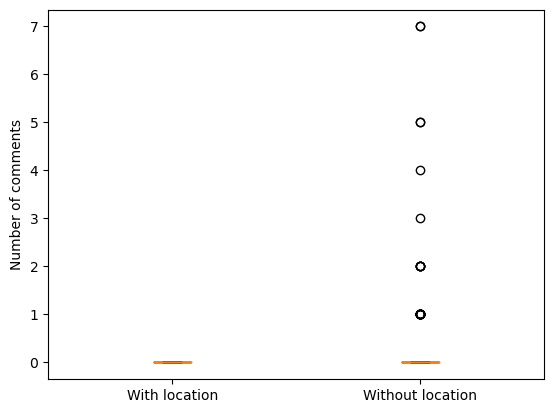

/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_55603/1825912301.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(location_posts, shade=True, label='With location mentions')
/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_55603/1825912301.py:12: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(location_posts, shade=True, label='With location mentions')
/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_55603/1825912301.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_location_posts, shade=True, label='Without location mentions')


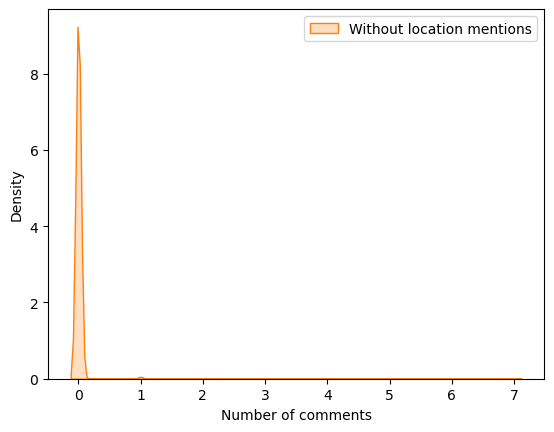

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visual inspection using box plots

plt.boxplot([location_posts, no_location_posts])
plt.xticks([1, 2], ['With location', 'Without location'])
plt.ylabel('Number of comments')
#plt.title('Box Plot of Comment Distributions')
plt.show()
# Creating the density plot
#sns.kdeplot(scores, shade=True, label='Retained posts')
sns.kdeplot(location_posts, shade=True, label='With location mentions')
sns.kdeplot(no_location_posts, shade=True, label='Without location mentions')


# Adding labels and title
plt.xlabel('Number of comments')
plt.ylabel('Density')


# Adding a legend
plt.legend()

# Displaying the density plot
#plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/2324sm01KDE_comments.png", bbox_inches='tight',format="png", dpi=800)
plt.show()

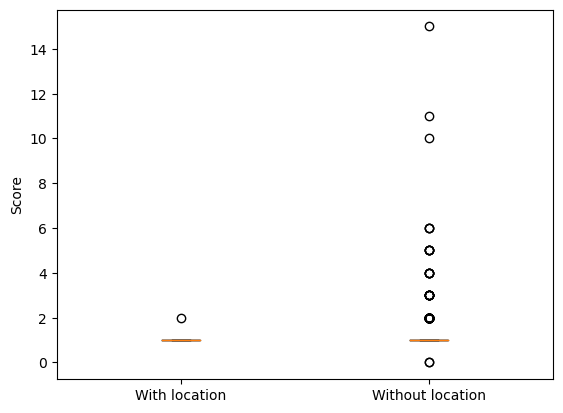

/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_55603/775431408.py:16: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(location_posts, shade=True, label='With location mentions')
/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_55603/775431408.py:17: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_location_posts, shade=True, label='Without location mentions')


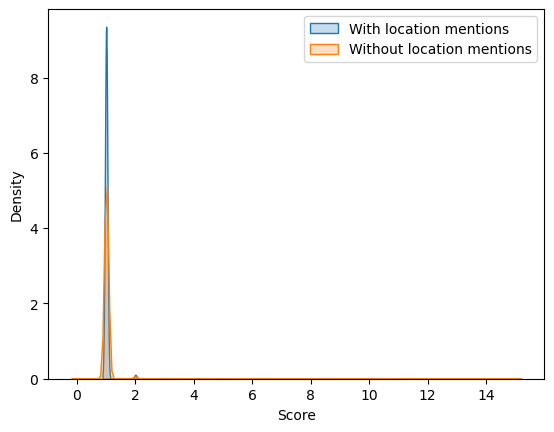

In [ ]:
lgroup1 = post_df[post_df['location_exits'] == 1]['score']
lgroup2 = post_df[post_df['location_exits'] == 0]['score']
location_posts=lgroup1
no_location_posts=lgroup2
import seaborn as sns
import matplotlib.pyplot as plt
# Visual inspection using box plots

plt.boxplot([location_posts, no_location_posts])
plt.xticks([1, 2], ['With location', 'Without location'])
plt.ylabel('Score')
#plt.title('Box Plot of Comment Distributions')
plt.show()
# Creating the density plot
#sns.kdeplot(scores, shade=True, label='Retained posts')
sns.kdeplot(location_posts, shade=True, label='With location mentions')
sns.kdeplot(no_location_posts, shade=True, label='Without location mentions')


# Adding labels and title
plt.xlabel('Score')
plt.ylabel('Density')


# Adding a legend
plt.legend()

# Displaying the density plot
#plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/2324sm01KDE_comments.png", bbox_inches='tight',format="png", dpi=800)
plt.show()

In [ ]:
url_pattern = re.compile(r'https?://\S+')

def extract_links(text):
    return url_pattern.findall(text)

# Apply the function to each row in the DataFrame
post_df['found_link'] = post_df['profane_filtered'].apply(extract_links)

# Count the number of rows with at least one URL
rows_with_urls = post_df['profane_filtered'].apply(bool).sum()


#print(df)

In [ ]:
rows_with_links = post_df[post_df['found_link'].apply(bool)]

# Print the 'merged' column for these rows
print(rows_with_links['profane_filtered'].shape[0])
print(rows_with_links['profane_filtered'])

12
74      https://onlyfans.com/thatb1tchb if you want to...
1250    Getting into bed&amp;#x200B; https://preview.r...
1252               hihttps://stripchat.com/Nastaszja_Grey
1398    *we went to a resort and my wife Loved glances...
1444                https://onlyfans.com/husbandwifebandb
1747    https://www.reddit.com/u/trades689/?utm_source...
1978    https://www.reddit.com/r/ukwifeswapping/commen...
2209    https://onlyfans.com/theclassycougar?rec=29733...
2248    Discord server for tributes[https://discord.co...
2775    My wife. of 2, 54. What do you think?[https://...
2987                    https://onlyfans.com/sexyoungwife
3830       Best server 2023. https://discord.gg/leaksonly
Name: profane_filtered, dtype: object


In [ ]:
from urllib.parse import urlparse

# Extract the first URL found and store it in 'link'
rows_with_links['link'] = rows_with_links['found_link'].apply(lambda x: x[0] if x else None)

# Extract the domain from the 'link' column and store it in 'domain'
rows_with_links['domain'] = rows_with_links['link'].apply(lambda x: urlparse(x).netloc if x else None)

# Now, rows_with_links contains 'link' and 'domain' columns
print(rows_with_links[['merged', 'link', 'domain']])


                                                 merged  \
74    https://onlyfans.com/thatb1tchb if you want to...   
1250  Getting into bed&amp;#x200B;\n\nhttps://previe...   
1252             hihttps://stripchat.com/Nastaszja_Grey   
1398  *we went to a topless resort and my wife Loved...   
1444              https://onlyfans.com/husbandwifebandb   
1747  https://www.reddit.com/u/trades689/?utm_source...   
1978  https://www.reddit.com/r/ukwifeswapping/commen...   
2209  https://onlyfans.com/theclassycougar?rec=29733...   
2248  Discord server for tributes[https://discord.co...   
2775  My sexy wife. Milf of 2, 54. What do you think...   
2987                  https://onlyfans.com/sexyoungwife   
3830     Best server 2023. https://discord.gg/leaksonly   

                                                   link           domain  
74                      https://onlyfans.com/thatb1tchb     onlyfans.com  
1250  https://preview.redd.it/vijn1f9x1q6a1.png?widt...  preview.redd.it  
1252   

/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_20068/4152157123.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_links['link'] = rows_with_links['found_link'].apply(lambda x: x[0] if x else None)
/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_20068/4152157123.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rows_with_links['domain'] = rows_with_links['link'].apply(lambda x: urlparse(x).netloc if x else None)


In [ ]:
# Count unique domains
unique_domains = rows_with_links['domain'].dropna().unique()
num_unique_domains = len(unique_domains)
print(f"Number of unique domains: {num_unique_domains}")

# Count the frequency of each domain
domain_counts = rows_with_links['domain'].dropna().value_counts()

print("Domain counts:")
print(domain_counts)

Number of unique domains: 7
Domain counts:
onlyfans.com       4
preview.redd.it    2
www.reddit.com     2
stripchat.com      1
discord.com        1
v3.redgifs.com     1
discord.gg         1
Name: domain, dtype: int64


In [ ]:
post_df['domain'] = post_df['url'].dropna().apply(lambda x: urlparse(x).netloc if x else None)


In [ ]:
unique_domains = post_df['domain'].dropna().unique()
num_unique_domains = len(unique_domains)
print(f"Number of unique domains: {num_unique_domains}")

# Count the frequency of each domain
domain_counts = post_df['domain'].dropna().value_counts()

print("Domain counts:")
print(domain_counts)

Number of unique domains: 28
Domain counts:
www.reddit.com                 2005
i.redd.it                      1759
v.redd.it                       551
i.imgur.com                      98
redgifs.com                      60
www.redgifs.com                  34
imgur.com                        14
i.redgifs.com                    10
maturehot.net                     7
v3.redgifs.com                    7
www.xvideos.com                   3
                                  3
www.erome.com                     2
external-preview.redd.it          1
topteen.re                        1
meet.google.com                   1
sendvid.com                       1
asberdezdadfad.blogspot.com       1
www.eroprofile.com                1
onlyfans.com                      1
bteeen.nl                         1
www.pornhub.com                   1
postimg.cc                        1
reddit.com                        1
twitter.com                       1
uwbja.nl                          1
linktr.ee           

In [ ]:
print(domain_counts[0:10])

www.reddit.com     2005
i.redd.it          1759
v.redd.it           551
i.imgur.com          98
redgifs.com          60
www.redgifs.com      34
imgur.com            14
i.redgifs.com        10
maturehot.net         7
v3.redgifs.com        7
Name: domain, dtype: int64


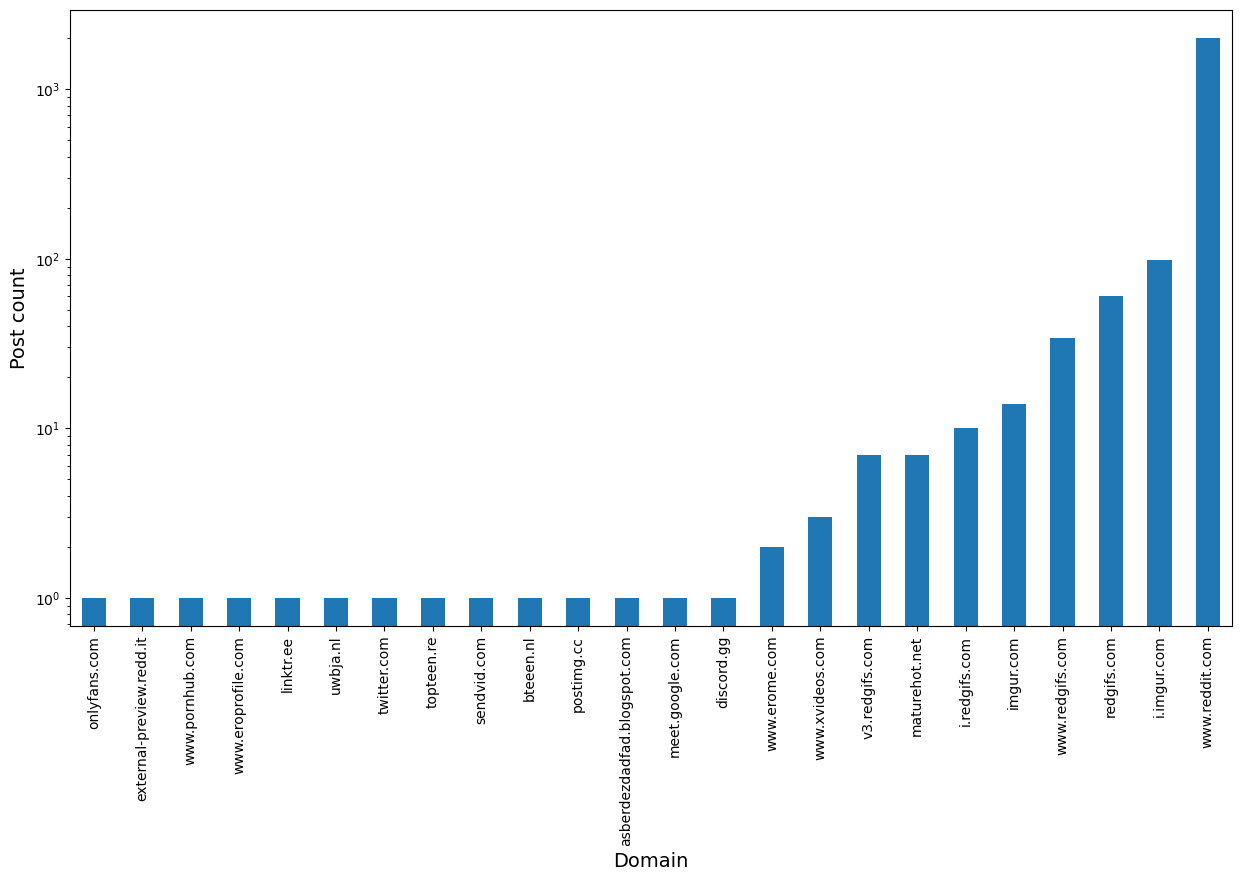

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

def get_posts_orign(df_p, title, xlabel, ylabel, limit, subreddit):
    # Filter out domains that are not relevant
    df_filtered = df_p[(df_p['domain'] != 'reddit.com') &
                       (df_p['domain'] != f'self.{subreddit}') &
                       (df_p['domain'] != 'i.redd.it') &
                       (df_p['domain'] != 'v.redd.it')]

    # Remove rows where 'domain' is empty or NaN
    df_filtered = df_filtered.dropna(subset=['domain'])
    df_filtered = df_filtered[df_filtered['domain'].str.strip() != '']

    # Group by domain and count the number of posts
    domain_counts = df_filtered.groupby(by='domain').size()

    # Select the top 'limit' domains
    top_domains = domain_counts.nlargest(limit).sort_values(ascending=True)

    # Plot a vertical bar chart
    top_domains.plot(
        kind='bar',  # Vertical bar plot
        rot=90,      # Rotate x-axis labels for readability
        figsize=(15, 8)  # Figure size
    )

    # Update axis labels
    plt.ylabel(xlabel,fontsize=14)
    plt.xlabel(ylabel,fontsize=14)

    # Apply logarithmic scale to the y-axis
    plt.yscale('log')

    # Set the title
    #plt.title(title)

    # Remove grid
    plt.grid(False)

    # Save and display the plot
    plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/24_cross_platform.png", bbox_inches='tight', format="png", dpi=800)
    plt.show()

# Example usage
# Ensure df_p does not have any empty domains before calling the function
# df_p = post_df.dropna(subset=['domain'])
get_posts_orign(post_df, "Post domains", "Post count", "Domain", 70, "wifesharing")


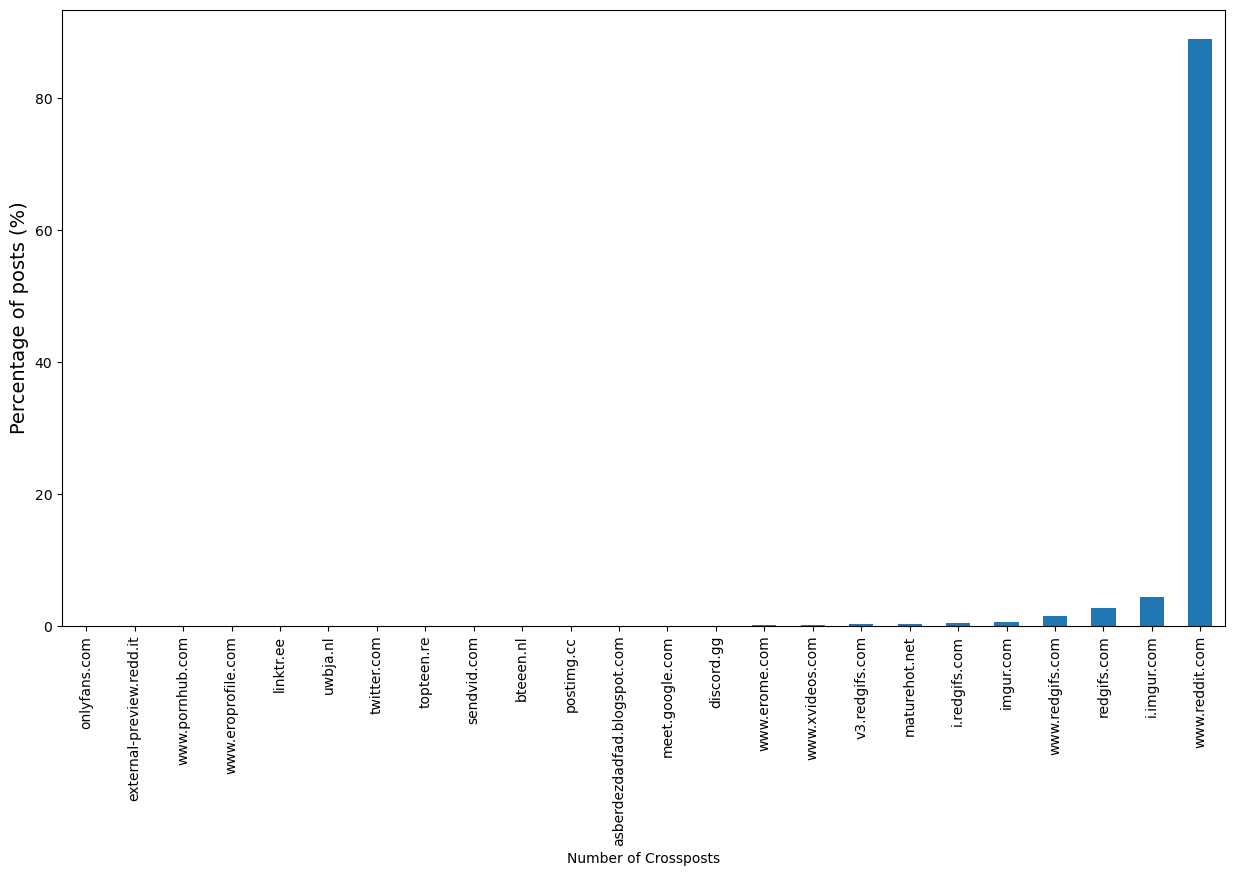

In [ ]:
import matplotlib.pyplot as plt

def get_posts_orign(df_p, title, xlabel, ylabel, limit, subreddit):
    # Filter out domains that are not relevant
    df_filtered = df_p[(df_p['domain'] != 'reddit.com') &
                       (df_p['domain'] != f'self.{subreddit}') &
                       (df_p['domain'] != 'i.redd.it') &
                       (df_p['domain'] != 'v.redd.it')]

    # Remove rows where 'domain' is empty or NaN
    df_filtered = df_filtered.dropna(subset=['domain'])
    df_filtered = df_filtered[df_filtered['domain'].str.strip() != '']

    # Group by domain and count the number of posts
    domain_counts = df_filtered.groupby(by='domain').size()

    # Calculate total posts
    total_posts = df_filtered.shape[0]

    # Select the top 'limit' domains
    top_domains = domain_counts.nlargest(limit).sort_values(ascending=True)

    # Calculate the percentage of posts for each top domain
    top_domains_percentage = (top_domains / total_posts) * 100

    # Plot a vertical bar chart for percentages
    top_domains_percentage.plot(
        kind='bar',  # Vertical bar plot
        rot=90,      # Rotate x-axis labels for readability
        figsize=(15, 8)  # Figure size
    )

    # Update axis labels
    plt.ylabel('Percentage of posts (%)',fontsize=14)
    plt.xlabel(ylabel)

    # Set the title
    #plt.title(title)

    # Remove grid
    plt.grid(False)

    # Save and display the plot
    plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/percentage24_cross_platform.png", bbox_inches='tight', format="png", dpi=800)
    plt.show()

# Example usage
get_posts_orign(post_df, "Origin of Crosspostings", "Domain", "Number of Crossposts", 70, "wifesharing")


In [ ]:

import pandas as pd
import requests
import time

def get_virustotal_category(api_key, domain, cache):
    # Check if the domain is already in the cache
    if domain in cache:
        return cache[domain]

    url = f"https://www.virustotal.com/api/v3/domains/{domain}"
    headers = {"x-apikey": api_key}

    response = requests.get(url, headers=headers)

    if response.status_code == 200:
        json_response = response.json()
        categories = json_response.get("data", {}).get("attributes", {}).get("categories", {})
        if categories:
            category = ", ".join(categories.values())
        else:
            category = "No category found"
    elif response.status_code == 429:
        print("Rate limit exceeded. Waiting before retrying...")
        time.sleep(60)  # Wait for a minute before retrying
        return get_virustotal_category(api_key, domain, cache)
    else:
        category = f"Error: {response.status_code}"

    # Save the result in the cache
    cache[domain] = category
    return category

def categorize_domains_in_dataframe(df, domain_column, api_key):
    cache = {}
    categories = []

    for domain in df[domain_column]:
        category = get_virustotal_category(api_key, domain, cache)
        categories.append(category)
        print(f"{domain}: {category}")

    df['Category'] = categories
    return df

# Example DataFrame with domains, including duplicates
#data = {'Domain': ['google.com', 'facebook.com', 'example.com', 'google.com', 'pornhub.com']}
#df = pd.DataFrame(data)
df=post_df
# Your VirusTotal API key
api_key = "01ef7fac74a12a4a652ce1604ea890f56918b45af56719a191408fc8baa0a657"

# Categorize domains and create a new 'Category' column
df = categorize_domains_in_dataframe(post_df, 'domain', api_key)


i.redd.it: timewasters, forums & newsgroups, blogs and forums, message boards and forums
v.redd.it: timewasters, online services, blogs and forums, message boards and forums
www.reddit.com: timewasters, social networks/adult content, blogs and forums, message boards and forums
i.redd.it: timewasters, forums & newsgroups, blogs and forums, message boards and forums
i.redd.it: timewasters, forums & newsgroups, blogs and forums, message boards and forums
i.redd.it: timewasters, forums & newsgroups, blogs and forums, message boards and forums
i.redd.it: timewasters, forums & newsgroups, blogs and forums, message boards and forums
www.reddit.com: timewasters, social networks/adult content, blogs and forums, message boards and forums
www.reddit.com: timewasters, social networks/adult content, blogs and forums, message boards and forums
www.reddit.com: timewasters, social networks/adult content, blogs and forums, message boards and forums
www.reddit.com: timewasters, social networks/adult con

In [ ]:
adult, pornography, porn, sex, sexually explicit

# Social Media

In [ ]:
import pandas as pd

import pandas as pd

def filter_df_by_words(df, words):
  """Filters a DataFrame based on whether any of the specified words appear exactly in the 'text' column.

  Args:
    df: The input DataFrame.
    words: A list of words to search for.

  Returns:
    A new DataFrame containing only the rows where at least one word from the list appears exactly in the 'text' column.
  """

  # Convert words to lowercase for case-insensitive matching
  words = [word.lower() for word in words]

  # Create a regular expression pattern using word boundaries (\b) to prevent subword matches
  pattern = r"\b(" + "|".join(words) + r")\b"

  # Filter the DataFrame based on the pattern
  new_df = df[df['merged'].str.lower().str.contains(pattern)]

  return new_df

def filter_df_by_words_set_column(df, words):
  """Filters a DataFrame based on whether any of the specified words appear exactly in the 'text' column.

  Args:
    df: The input DataFrame.
    words: A list of words to search for.

  Returns:
    The modified DataFrame with a new column indicating whether any of the specified words are present (1) or absent (0).
  """

  # Convert words to lowercase for case-insensitive matching
  words = [word.lower() for word in words]

  # Create a regular expression pattern using word boundaries (\b) to prevent subword matches
  pattern = r"\b(" + "|".join(words) + r")\b"

  # Create a boolean mask for any of the words
  mask = df['merged'].str.lower().str.contains(pattern)

  # Set the column value to 1 if any word is present, otherwise 0
  df['social_media'] = mask.astype(int)

  return df

# filtered the posts based on the keywords
specific_words = [ "facebook", "fb", "instagram", "ig", "insta", "twitter", "tweet", "tw", "snapchat",
"snap", "sc", "youtube", "yt", "tiktok", "tt", "linkedin", "pinterest", "pin",
"whatsapp", "wa", "wechat", "tumblr", "telegram", "tele", "discord", "disc", "cord","twitch",
"medium", "quora", "vine", "happn", "onlyfans","kik"]

post_df = filter_df_by_words_set_column(post_df, specific_words)
post_df.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/Wife_dec22-feb23_duplicatedropped.csv")


/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_20068/159638781.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df['merged'].str.lower().str.contains(pattern)


In [ ]:
direct_message=['dm', 'dms', 'inbox', 'message', 'msg', 'hmu', 'hit me up', 'ping']
dm_post_df = filter_df_by_words(post_df, direct_message)
# Print the filtered dataframe
print(dm_post_df.shape[0])

812


/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_20068/159638781.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  new_df = df[df['merged'].str.lower().str.contains(pattern)]


In [ ]:
post_df[post_df['social_media']==1].shape[0]/post_df.shape[0]


0.15069967707212056

In [ ]:
print(sm_post_df[(sm_post_df['selftext']=='[deleted]') | (sm_post_df['selftext']=='[removed]')].shape[0])
sm_post_df[(sm_post_df['selftext']=='[deleted]') | (sm_post_df['selftext']=='[removed]')].shape[0]/post_df[(post_df['selftext']=='[deleted]') | (post_df['selftext']=='[removed]')].shape[0]

6


0.125

In [ ]:
print(sm_post_df[(sm_post_df['selftext']!='[deleted]') & (sm_post_df['selftext']!='[removed]')].shape[0])
sm_post_df[(sm_post_df['selftext']!='[deleted]') & (sm_post_df['selftext']!='[removed]')].shape[0]/post_df[(post_df['selftext']!='[deleted]') & (post_df['selftext']!='[removed]')].shape[0]

694


0.15096802262345008

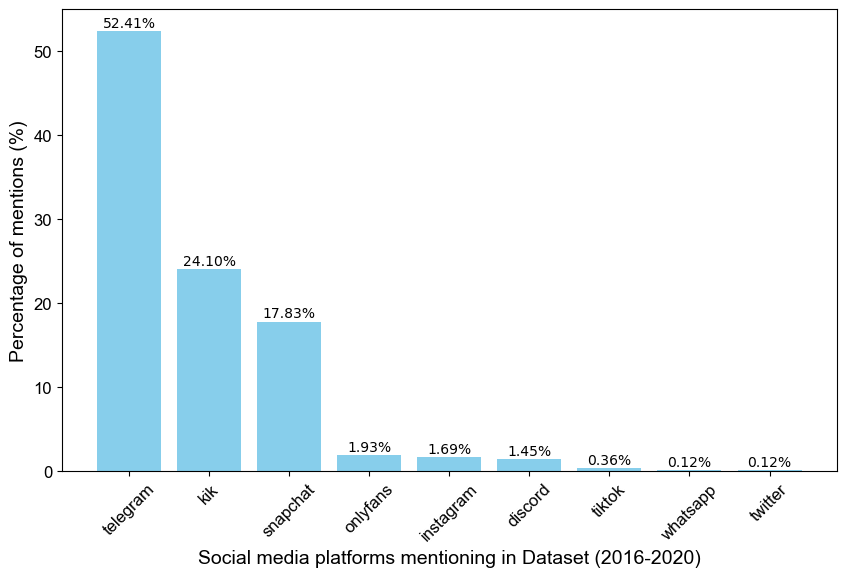

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib import font_manager as fm
import re

# Social media mapping
social_media_map = {
    "facebook": "facebook", "fb": "facebook",
    "instagram": "instagram", "ig": "instagram", "insta": "instagram",
    "twitter": "twitter", "tweet": "twitter", "tw": "twitter",
    "snapchat": "snapchat", "snap": "snapchat", "sc": "snapchat",
    "youtube": "youtube", "yt": "youtube",
    "tiktok": "tiktok", "tt": "tiktok",
    "linkedin": "linkedin", "pinterest": "pinterest", "pin": "pinterest",
    "whatsapp": "whatsapp",
    "wechat": "wechat", "tumblr": "tumblr", "telegram": "telegram", "tele": "telegram",
    "discord": "discord", "twitch": "twitch", "medium": "medium",
    "quora": "quora", "vine": "vine", "onlyfans": "onlyfans", "kik": "kik", "only fans": "onlyfans"
}

# Create a regex pattern to match any of the social media words
pattern = re.compile(rf"\b(?:{'|'.join(map(re.escape, social_media_map.keys()))})\b", re.IGNORECASE)

# Function to find social media mentions
def find_social_media_mentions(text):
    matches = pattern.findall(text)
    normalized_mentions = [social_media_map[match.lower()] for match in matches]
    return normalized_mentions

# Apply the function to the 'merged' column
post_df['social_media_mentions'] = post_df['merged'].apply(find_social_media_mentions)

# Flatten the list of all mentions and count occurrences
all_mentions = [mention for sublist in post_df['social_media_mentions'] for mention in sublist]
mention_counts = Counter(all_mentions)

# Calculate the total number of mentions
total_mentions = sum(mention_counts.values())

# Calculate the percentage for each social media platform
mention_percentages = {platform: (count / total_mentions) * 100 for platform, count in mention_counts.items()}

# Font properties
title_font = {'family': 'Arial', 'weight': 'bold', 'size': 16}
label_font = {'family': 'Arial', 'size': 14}

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(mention_percentages.keys(), mention_percentages.values(), color='skyblue')
plt.xlabel('Social media platforms mentioning in Dataset (2016-2020)', fontdict=label_font)
plt.ylabel('Percentage of mentions (%)', fontdict=label_font)
#plt.yscale('log')

# Set font properties for ticks
font_prop = fm.FontProperties(family='Arial', size=12)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

# Add percentage text above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Save and show the plot
plt.grid(False)
plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/24_social_media_percentage.png", bbox_inches='tight', format="png", dpi=800)
plt.show()


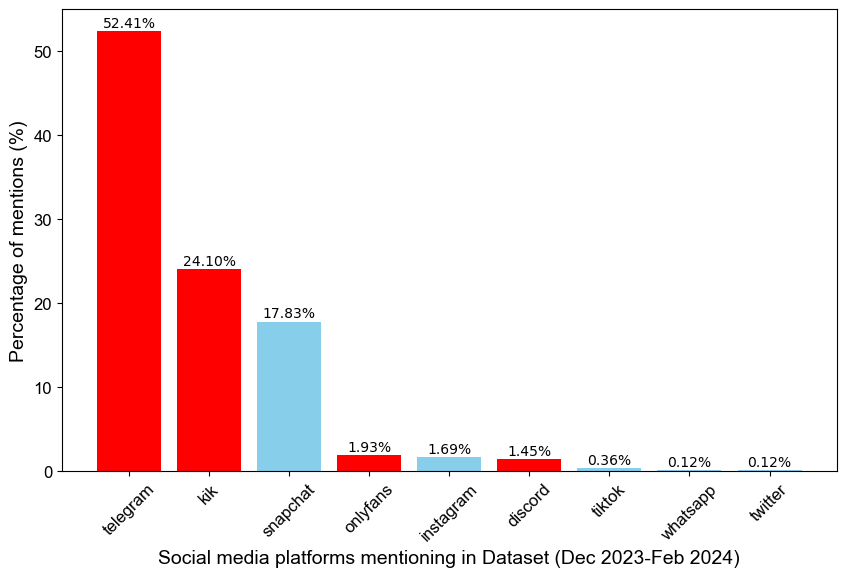

In [ ]:
import matplotlib.pyplot as plt
from collections import Counter
from matplotlib import font_manager as fm
import re

# Social media mapping
social_media_map = {
    "facebook": "facebook", "fb": "facebook",
    "instagram": "instagram", "ig": "instagram", "insta": "instagram",
    "twitter": "twitter", "tweet": "twitter", "tw": "twitter",
    "snapchat": "snapchat", "snap": "snapchat", "sc": "snapchat",
    "youtube": "youtube", "yt": "youtube",
    "tiktok": "tiktok", "tt": "tiktok",
    "linkedin": "linkedin", "pinterest": "pinterest", "pin": "pinterest",
    "whatsapp": "whatsapp",
    "wechat": "wechat", "tumblr": "tumblr", "telegram": "telegram", "tele": "telegram",
    "discord": "discord", "twitch": "twitch", "medium": "medium",
    "quora": "quora", "vine": "vine", "onlyfans": "onlyfans", "kik": "kik", "only fans": "onlyfans"
}

# List of dark platforms
dark_platforms = ["telegram", "discord", "onlyfans", "kik"]

# Create a regex pattern to match any of the social media words
pattern = re.compile(rf"\b(?:{'|'.join(map(re.escape, social_media_map.keys()))})\b", re.IGNORECASE)

# Function to find social media mentions
def find_social_media_mentions(text):
    matches = pattern.findall(text)
    normalized_mentions = [social_media_map[match.lower()] for match in matches]
    return normalized_mentions

# Apply the function to the 'merged' column
post_df['social_media_mentions'] = post_df['merged'].apply(find_social_media_mentions)

# Flatten the list of all mentions and count occurrences
all_mentions = [mention for sublist in post_df['social_media_mentions'] for mention in sublist]
mention_counts = Counter(all_mentions)

# Calculate the total number of mentions
total_mentions = sum(mention_counts.values())

# Calculate the percentage for each social media platform
mention_percentages = {platform: (count / total_mentions) * 100 for platform, count in mention_counts.items()}

# Sort platforms by percentage in descending order
sorted_mentions = dict(sorted(mention_percentages.items(), key=lambda item: item[1], reverse=True))

# Font properties
title_font = {'family': 'Arial', 'weight': 'bold', 'size': 16}
label_font = {'family': 'Arial', 'size': 14}

# Assign colors: red for dark platforms, skyblue for mainstream platforms
colors = ['red' if platform in dark_platforms else 'skyblue' for platform in sorted_mentions.keys()]

# Plotting the bar graph with sorted data
plt.figure(figsize=(10, 6))
bars = plt.bar(sorted_mentions.keys(), sorted_mentions.values(), color=colors)
plt.xlabel('Social media platforms mentioning in Dataset (Dec 2023-Feb 2024)', fontdict=label_font)
plt.ylabel('Percentage of mentions (%)', fontdict=label_font)
# plt.yscale('log')

# Set font properties for ticks
font_prop = fm.FontProperties(family='Arial', size=12)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

# Add percentage text above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Save and show the plot
plt.grid(False)


plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/2324color_social_media_percentage.png", bbox_inches='tight', format="png", dpi=800)
plt.show()


Counter({'kik': 4, 'telegram': 2, 'snapchat': 1})


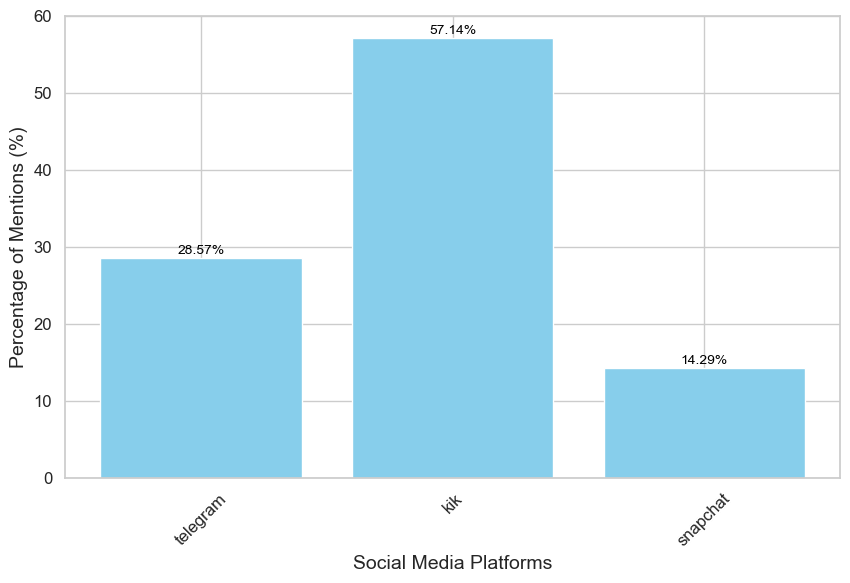

In [ ]:
# Flatten the list of all mentions and count occurrences
del_post_df=post_df[(post_df['selftext']=='[deleted]')| (post_df['selftext']=='[removed]')]
all_mentions = [mention for sublist in del_post_df['social_media_mentions'] for mention in sublist]

mention_counts = Counter(all_mentions)

# Calculate the total number of mentions
total_mentions = sum(mention_counts.values())
print(mention_counts)

# Calculate the percentage for each social media platform
mention_percentages = {platform: (count / total_mentions) * 100 for platform, count in mention_counts.items()}

# Font properties
title_font = {'family': 'Arial', 'weight': 'bold', 'size': 16}
label_font = {'family': 'Arial', 'size': 14}

# Plotting the bar graph
plt.figure(figsize=(10, 6))
bars = plt.bar(mention_percentages.keys(), mention_percentages.values(), color='skyblue')
plt.xlabel('Social Media Platforms', fontdict=label_font)
plt.ylabel('Percentage of Mentions (%)', fontdict=label_font)
#plt.yscale('log')

# Set font properties for ticks
font_prop = fm.FontProperties(family='Arial', size=12)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)

# Add percentage text above each bar
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10, color='black')

# Save and show the plot
plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/deleted_24_social_media_percentage.png", bbox_inches='tight', format="png", dpi=800)
plt.show()

In [ ]:
post_df.columns

Index(['Unnamed: 0.4', 'Unnamed: 0.3', 'Unnamed: 0.2', 'Unnamed: 0.1',
       'Unnamed: 0', 'id', 'created_utc', 'title', 'selftext', 'author',
       'author_flair_text', 'score', 'comments', 'num_comments',
       'num_crossposts', 'edited', 'is_original_content', 'link_flair_text',
       'locked', 'name', 'over_18', 'permalink', 'upvote_ratio', 'url',
       'spoiler', 'stickied', 'subreddit', 'merged', 'social_count',
       'normalized_mentions', 'link', 'found_link', 'text_with_mentions',
       'social_media', 'social_media_mentions', 'trading', 'lemmatized_text',
       'filtered_merged', 'ssn', 'profane_filtered'],
      dtype='object')

In [ ]:
post_df.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/Wife_dec22-feb23_duplicatedropped.csv")

In [ ]:
import pandas as pd
import re

# Sample DataFrame

# Create a regex pattern to match any of the social media words
pattern = re.compile(rf"\b(?:{'|'.join(map(re.escape, specific_words))})\b", re.IGNORECASE)

# Function to count the number of social media mentions in a text
def count_social_media_mentions(text):
    matches = pattern.findall(text)
    return len(matches)

# Apply the function to each row in the DataFrame
sm_post_df['social_count'] = sm_post_df['merged'].apply(count_social_media_mentions)

# Display the DataFrame with the count of social media mentions
#post_df.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/Wife_dec22-feb23_duplicatedropped.csv")


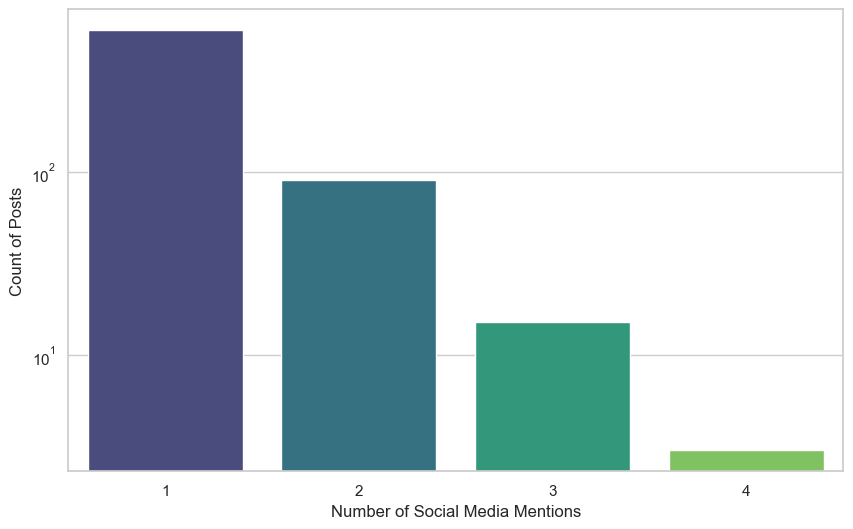

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plot
sns.set(style="whitegrid")
sm_post_df=sm_post_df[sm_post_df['social_count']>0]
# Create a bar plot
plt.figure(figsize=(10, 6))
sns.countplot(x='social_count', data=sm_post_df, palette='viridis')

# Set title and labels with the appropriate font sizes
#plt.title('Distribution of Social Media Mentions in Posts', fontsize=14)
plt.xlabel('Number of Social Media Mentions', fontsize=12)
plt.ylabel('Count of Posts', fontsize=12)
plt.yscale('log')
# Show the plot
plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/24_#social_media_mentions.png", bbox_inches='tight',format="png", dpi=800)
plt.show()



1    593
2     90
3     15
4      3
Name: social_count, dtype: int64


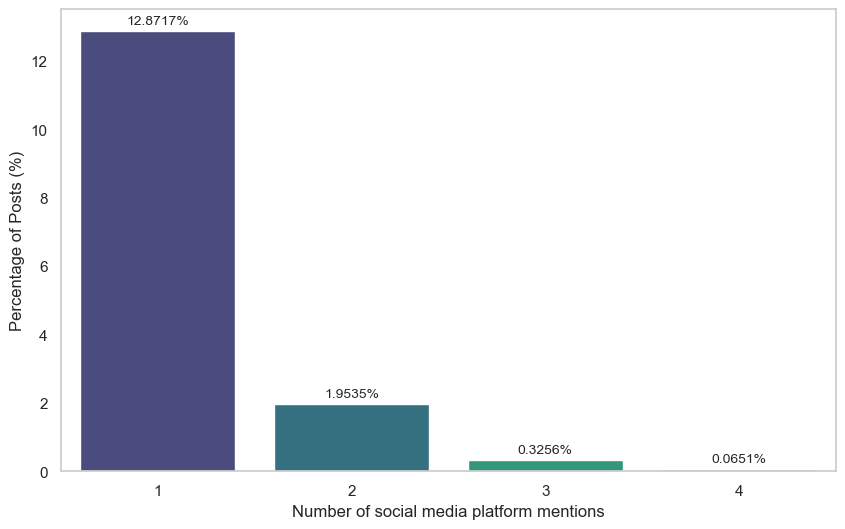

In [ ]:
# @title Default title text
import matplotlib.pyplot as plt
import seaborn as sns


# Calculate the percentage distribution
total_count = sm_post_df['social_count'].value_counts().sort_index()
print(total_count)
#percentage = (total_count / total_count.sum()) * 100
percentage = (total_count / post_df.shape[0]) * 100

# Set the style for the plot
#sns.set(style="whitegrid")

# Create a bar plot with percentages
plt.figure(figsize=(10, 6))
sns.barplot(x=percentage.index, y=percentage.values, palette='viridis')

# Set title and labels with the appropriate font sizes
#plt.title('Percentage Distribution of Social Media Mentions in Posts', fontsize=14)
plt.xlabel('Number of social media platform mentions', fontsize=12)
plt.ylabel('Percentage of Posts (%)', fontsize=12)

# Display the percentage above each bar
for index, value in enumerate(percentage.values):
    plt.text(index, value + 0.2, f'{value:.4f}%', ha='center', fontsize=10)
plt.grid(False)

plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/24_#social_media_mentions_percentage.png", bbox_inches='tight',format="png", dpi=800)
plt.show()



<ipython-input-14-7681caad0dd8>:25: DtypeWarning: Columns (7,13,21) have mixed types. Specify dtype option on import or set low_memory=False.
  df_historical = pd.read_csv("/content/Wife_duplicatedropped16-20.csv")


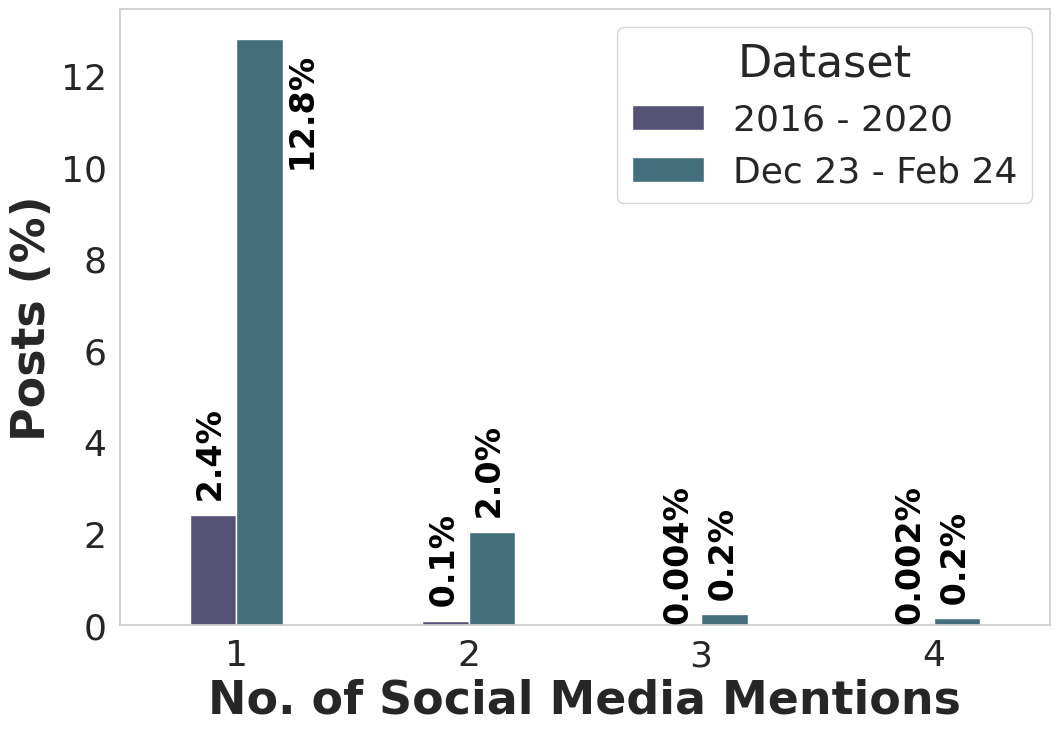

In [14]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns

# Define the specific words to count as social media mentions
specific_words = [
    "facebook", "fb", "instagram", "ig", "insta", "twitter", "tweet", "tw",
    "snapchat", "snap", "sc", "youtube", "yt", "tiktok", "tt", "linkedin",
    "pinterest", "pin", "whatsapp", "wa", "wechat", "tumblr", "telegram",
    "tele", "discord", "disc", "cord", "twitch", "medium", "quora", "vine",
    "happn", "onlyfans", "kik"
]

# Create a regex pattern to match any of the social media words
pattern = re.compile(rf"\b(?:{'|'.join(map(re.escape, specific_words))})\b", re.IGNORECASE)

# Function to count the number of social media mentions in a text
def count_social_media_mentions(text):
    matches = pattern.findall(str(text))  # Convert to string to handle any non-string entries
    return len(matches)

# Load historical and current datasets
df_historical = pd.read_csv("/content/Wife_duplicatedropped16-20.csv")
df_current = pd.read_csv("/content/Wife_dec22-feb23_profanedropped.csv")

# Add the 'social_count' column to each dataset
df_historical['social_count'] = df_historical['merged'].apply(count_social_media_mentions)
df_current['social_count'] = df_current['merged'].apply(count_social_media_mentions)

# Function to calculate percentage distribution for social media mentions
def calculate_percentage(df, total_posts):
    mention_counts = df['social_count'].value_counts().sort_index()
    percentage = (mention_counts / total_posts) * 100
    return percentage

# Calculate percentage distributions for both datasets
total_posts_historical = df_historical.shape[0]
total_posts_current = df_current.shape[0]

percentage_historical = calculate_percentage(df_historical, total_posts_historical)
percentage_current = calculate_percentage(df_current, total_posts_current)

# Prepare data for plotting, focusing only on mention counts from 1 to 5
mention_levels = range(1, 5)
data = {
    'Mentions': list(mention_levels) * 2,
    'Percentage': [
        percentage_historical.get(level, 0) for level in mention_levels
    ] + [
        percentage_current.get(level, 0) for level in mention_levels
    ],
    'Type': ['2016 - 2020'] * len(mention_levels) + ['Dec 23 - Feb 24'] * len(mention_levels)
}

# Create the DataFrame for plotting
plot_df = pd.DataFrame(data)

# Set the style for the plot
sns.set(style="whitegrid")

# Define the color palette with the specified colors
palette = {
    '2016 - 2020': '#504c7c',  # Dark purple for historical data
    'Dec 23 - Feb 24': '#387484'  # Teal for current data
}

# Create the bar plot
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(
    x='Mentions', y='Percentage', hue='Type', data=plot_df,
    palette=palette, dodge=True, width=0.4
)

# Set axis labels and ticks
plt.xlabel('No. of Social Media Mentions', fontsize=33, weight='bold')
plt.ylabel('Posts (%)', fontsize=33,weight='bold')
plt.xticks(fontsize=26)
plt.yticks(fontsize=26)

# Update the legend labels with the correct size
plt.legend(title="Dataset", fontsize=26, title_fontsize=32)

# Remove gridlines for clarity
plt.grid(False)

# Add percentage values above the bars with default formatting
for p in bar_plot.patches:
    height = p.get_height()

    # Only add text if the bar has a non-zero height
    if height > 0.0000000001:
        # Determine the appropriate decimal format based on the value
        if height >= 0.1:
            display_text = f' {height:.1f}%'
        else:
            # Dynamically adjust decimal places until a non-zero fraction is reached
            display_text = f'{height:.3f}%'

        # Add the text to the bar
        bar_plot.text(
            x=p.get_x() + p.get_width() / 2 if height <5 else p.get_x() + p.get_width()*1.5 ,
            y = height + 0.2 if height < 5 else height-3,
            s=display_text,
            ha='center',
            fontsize=24,
            color='black',
            weight='bold',
            rotation=90
        )


# Save the plot with high resolution
plt.savefig("social_media_mentions_percentage.pdf", bbox_inches='tight', format="pdf", dpi=800)
plt.show()


In [ ]:
# Apply the function to each row in the DataFrame
from itertools import combinations
pattern = re.compile(rf"\b(?:{'|'.join(map(re.escape, social_media_map.keys()))})\b", re.IGNORECASE)

def find_social_media_mentions(text):
    matches = pattern.findall(text)
    normalized_mentions = {social_media_map[match.lower()] for match in matches}
    return list(normalized_mentions)


sm_post_df['normalized_mentions'] = sm_post_df['merged'].apply(find_social_media_mentions)
total_count=sm_post_df.shape[0]
# Count individual mentions
item_counts = {}
for mentions in sm_post_df['normalized_mentions']:
    for item in mentions:
        if item in item_counts:
            item_counts[item] += 1
        else:
            item_counts[item] = 1

# Count co-occurrences of itemsets of size 2
co_occurrence_counts = {}
for mentions in sm_post_df['normalized_mentions']:
    if len(mentions) > 1:
        for combo in combinations(mentions, 2):  # Combination size should be 2 for pair co-occurrence
            combo = tuple(sorted(combo))
            if combo in co_occurrence_counts:
                co_occurrence_counts[combo] += 1
            else:
                co_occurrence_counts[combo] = 1



/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_9354/336041901.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sm_post_df['normalized_mentions'] = sm_post_df['merged'].apply(find_social_media_mentions)


In [ ]:
# Convert counts to DataFrames with percentages
total_count = sm_post_df.shape[0]
item_counts_df = pd.DataFrame(item_counts.items(), columns=['Item', 'Count'])
item_counts_df['Percentage'] = (item_counts_df['Count'] / total_count) * 100

# Sort by Percentage in descending order
item_counts_df = item_counts_df.sort_values(by='Percentage', ascending=False)

# For co-occurrence counts
co_occurrence_df = pd.DataFrame(co_occurrence_counts.items(), columns=['Itemset', 'Count'])
co_occurrence_df['Percentage'] = (co_occurrence_df['Count'] / total_count) * 100

# Sort by Percentage in descending order
co_occurrence_df = co_occurrence_df.sort_values(by='Percentage', ascending=False)

# Print the results
print("Individual Item Counts and Percentages (Descending Order):")
print(item_counts_df)

print("\nItemset Counts and Percentages (Descending Order):")
print(co_occurrence_df)

Individual Item Counts and Percentages (Descending Order):
        Item  Count  Percentage
1   telegram    411   58.630528
0        kik    197   28.102710
2   snapchat    130   18.544936
3   onlyfans     16    2.282454
4  instagram     14    1.997147
5    discord     10    1.426534
6     tiktok      3    0.427960
7   whatsapp      1    0.142653
8    twitter      1    0.142653

Itemset Counts and Percentages (Descending Order):
                  Itemset  Count  Percentage
0         (kik, telegram)     44    6.276748
2    (snapchat, telegram)     18    2.567760
1         (kik, snapchat)     11    1.569187
3   (instagram, snapchat)     11    1.569187
4   (instagram, telegram)      7    0.998573
5     (discord, snapchat)      1    0.142653
6          (discord, kik)      1    0.142653
7     (discord, telegram)      1    0.142653
8           (kik, tiktok)      1    0.142653
9      (telegram, tiktok)      1    0.142653
10   (snapchat, whatsapp)      1    0.142653


In [ ]:
post_df['normalized_mentions'] = post_df['merged'].apply(find_social_media_mentions)
total_count=post_df.shape[0]
# Count individual mentions
item_counts = {}
for mentions in post_df['normalized_mentions']:
    for item in mentions:
        if item in item_counts:
            item_counts[item] += 1
        else:
            item_counts[item] = 1

# Count co-occurrences of itemsets of size 2
co_occurrence_counts = {}
for mentions in post_df['normalized_mentions']:
    if len(mentions) > 1:
        for combo in combinations(mentions, 2):  # Combination size should be 2 for pair co-occurrence
            combo = tuple(sorted(combo))
            if combo in co_occurrence_counts:
                co_occurrence_counts[combo] += 1
            else:
                co_occurrence_counts[combo] = 1

# Convert counts to DataFrames with percentages
item_counts_df = pd.DataFrame(item_counts.items(), columns=['Item', 'Count'])
item_counts_df['Percentage'] = (item_counts_df['Count'] / total_count) * 100

co_occurrence_df = pd.DataFrame(co_occurrence_counts.items(), columns=['Itemset', 'Count'])
co_occurrence_df['Percentage'] = (co_occurrence_df['Count'] / total_count) * 100

print("Individual Item Counts and Percentages:")
print(item_counts_df)

print("\nItemset Counts and Percentages:")
print(co_occurrence_df)

Individual Item Counts and Percentages:
        Item  Count  Percentage
0        kik    197    4.276102
1   telegram    411    8.921207
2   snapchat    130    2.821793
3   onlyfans     16    0.347298
4  instagram     14    0.303885
5    discord     10    0.217061
6     tiktok      3    0.065118
7   whatsapp      1    0.021706
8    twitter      1    0.021706

Itemset Counts and Percentages:
                  Itemset  Count  Percentage
0         (kik, telegram)     44    0.955068
1         (kik, snapchat)     11    0.238767
2    (snapchat, telegram)     18    0.390710
3   (instagram, snapchat)     11    0.238767
4   (instagram, telegram)      7    0.151943
5     (discord, snapchat)      1    0.021706
6          (discord, kik)      1    0.021706
7     (discord, telegram)      1    0.021706
8           (kik, tiktok)      1    0.021706
9      (telegram, tiktok)      1    0.021706
10   (snapchat, whatsapp)      1    0.021706


KeyError: 'onlyfans'

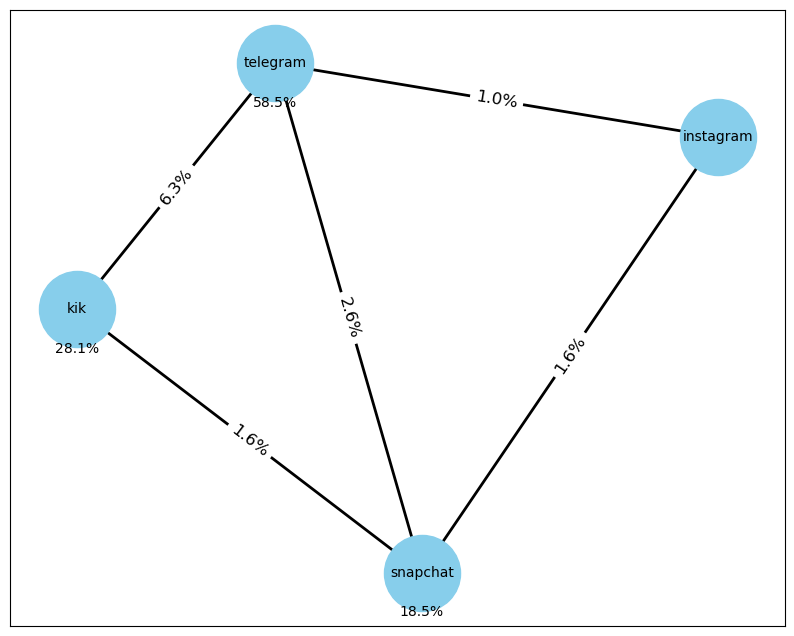

In [ ]:
total_count = 702

# Create a graph object
import networkx as nx
import matplotlib.pyplot as plt

# Individual counts
individual_counts = {

    'telegram':    411,
       'kik' :   197,
   'snapchat':    130,
   'onlyfans' :     16,
  'instagram'  :   14,
    'discord' :    10,
     'tiktok':      3,
}

# Two-item set counts
co_occurrence_counts = {
    ('kik', 'telegram'): 44,
    ('snapchat', 'telegram'): 18,
    ('kik', 'snapchat'): 11,
    ('instagram', 'telegram'): 7,
    ('instagram', 'snapchat'): 11
}

total_posts = 702

# Calculate percentages for individual counts
node_percentages = {node: (count / total_posts) * 100 for node, count in individual_counts.items()}

# Create a graph
G = nx.Graph()

# Add edges with the percentage count as the weight for two-item sets
for (a, b), count in co_occurrence_counts.items():
    percentage = (count / total_posts) * 100
    G.add_edge(a, b, weight=percentage)

# Get positions for nodes using circular layout
pos = nx.spring_layout(G)
#circular/spring/random/spectral/fruchterman_reingold
# Draw the graph
plt.figure(figsize=(10, 8))
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color='skyblue')
nx.draw_networkx_edges(G, pos, width=2)  # Uniform edge width
nx.draw_networkx_labels(G, pos, font_size=10)

# Draw edge labels to show the percentage counts
edge_labels = nx.get_edge_attributes(G, 'weight')
edge_labels = {k: f'{v:.1f}%' for k, v in edge_labels.items()}  # Format as percentage
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

# Draw node labels (name) and percentage without overlap
for node, percentage in node_percentages.items():
    x, y = pos[node]
    #plt.text(x, y + 0.05, node, fontsize=12, ha='center', fontweight='bold')  # Name slightly above the node
    plt.text(x, y - 0.05, f'{percentage:.1f}%', fontsize=10, ha='center', va='center')  # Percentage slightly below

plt.title('Social Media Platform Co-Occurrence Circular Network')
plt.show()



In [ ]:
# filtered the posts based on the keywords
specific_words = ["facebook", "fb", "instagram", "ig", "insta", "twitter", "tweet", "tw", "snapchat",
                  "snap", "sc", "youtube", "yt", "tiktok", "tt", "linkedin", "pinterest", "pin",
                  "whatsapp", "wa", "wechat", "tumblr", "telegram", "tele", "discord", "twitch", "medium",
                  "quora", "vine", "happn", "onlyfans","kik","only fans"]

sm_post_df = filter_df_by_words_set_column(post_df, specific_words)

#print(sm_post_df.shape)

/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_9354/159638781.py:45: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df['merged'].str.lower().str.contains(pattern)


In [ ]:
social_media=sm_post_df[sm_post_df['social_media']==1]
social_media.shape

(701, 34)

In [ ]:
social_media['social_count'] = social_media['merged'].apply(count_social_media_mentions)


# Engagement Analysis

In [ ]:
import pandas as pd
post_df=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/Wife_dec22-feb23_profanedropped.csv")

group1 = post_df[post_df['social_media'] == 1]['num_comments']
group2 = post_df[post_df['social_media'] == 0]['num_comments']
social_media_posts=group1
no_social_media_posts=group2

In [ ]:
social_media_posts_comments=group1
no_social_media_posts_comments=group2

In [ ]:
from scipy.stats import spearmanr, mannwhitneyu, kruskal
stat, p_value = mannwhitneyu(group1, group2)
print(f"Mann-Whitney U Test between groups with and without social media mentions: U-statistic={stat}, p-value={p_value}")




Mann-Whitney U Test between groups with and without social media mentions: U-statistic=1354196.0, p-value=0.10469843243426212


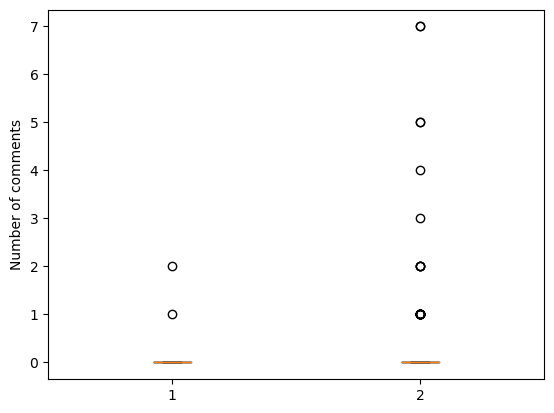

/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_20068/971683080.py:11: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(social_media_posts, shade=True, label='With social media mentions')
/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_20068/971683080.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_social_media_posts, shade=True, label='Without social media mentions')


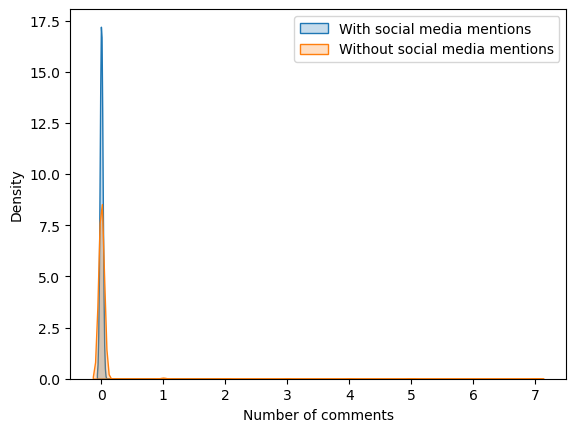

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visual inspection using box plots
plt.boxplot([social_media_posts, no_social_media_posts])

plt.ylabel('Number of comments')
#plt.title('Box Plot of Comment Distributions')
plt.show()
# Creating the density plot
#sns.kdeplot(scores, shade=True, label='Retained posts')
sns.kdeplot(social_media_posts, shade=True, label='With social media mentions')
sns.kdeplot(no_social_media_posts, shade=True, label='Without social media mentions')


# Adding labels and title
plt.xlabel('Number of comments')
plt.ylabel('Density')


# Adding a legend
plt.legend()

# Displaying the density plot
plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/2324sm01KDE_comments.png", bbox_inches='tight',format="png", dpi=800)
plt.show()

In [ ]:
pooled_std = np.sqrt(((len(social_media_posts) - 1) * np.var(social_media_posts) + (len(no_social_media_posts) - 1) * np.var(no_social_media_posts)) / (len(social_media_posts) + len(no_social_media_posts) - 2))

cohen_d = (np.mean(social_media_posts) - np.mean(no_social_media_posts)) / pooled_std
hedges_g = cohen_d * (1 - 3 / (4 * (len(social_media_posts) + len(no_social_media_posts) - 3)))
print("Cohen's d:", cohen_d)
print("Hedges' g:", hedges_g)

Cohen's d: -0.054747779673604016
Hedges' g: -0.054738832008588714


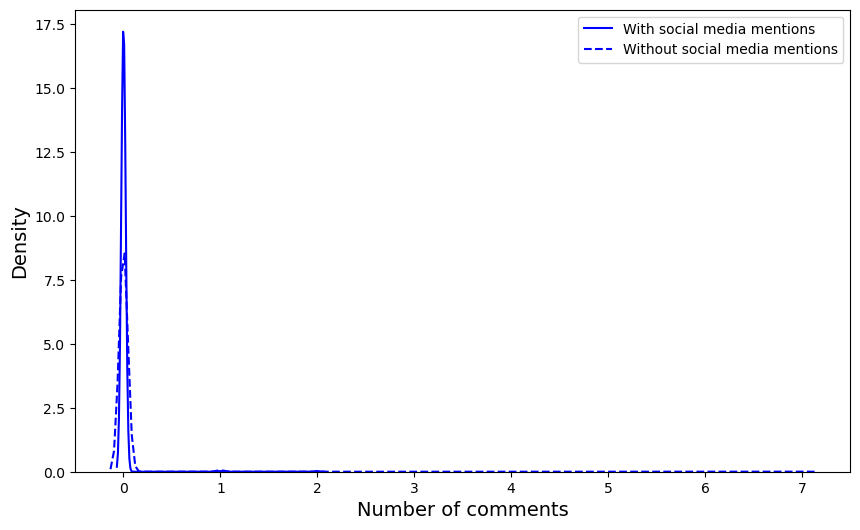

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the density plot
plt.figure(figsize=(10, 6))

# Plotting density with dotted lines for both groups
sns.kdeplot(social_media_posts, label='With social media mentions', linestyle='-', color='blue')
sns.kdeplot(no_social_media_posts, label='Without social media mentions', linestyle='--', color='blue')

# Adding labels and title
plt.xlabel('Number of comments',fontsize=14)
plt.ylabel('Density',fontsize=14)
#plt.title('Density Plot of Posts by Social Media Mention')

# Adding a legend
plt.legend()

# Show the plot
plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/2324KDE_comments.png", bbox_inches='tight',format="png", dpi=800)
plt.show()


Mann-Whitney U Test between groups with and without social media mentions: U-statistic=1353203.5, p-value=0.22456862946678713
Cohen's d: -0.05832847103178654
Hedges' g: -0.058318938158987706


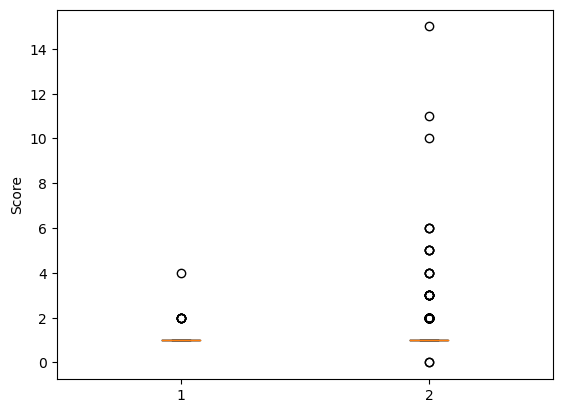

/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_20068/1109720703.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(social_media_posts, shade=True, label='With social media mentions')
/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_20068/1109720703.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_social_media_posts, shade=True, label='Withoutsocial media mentions')


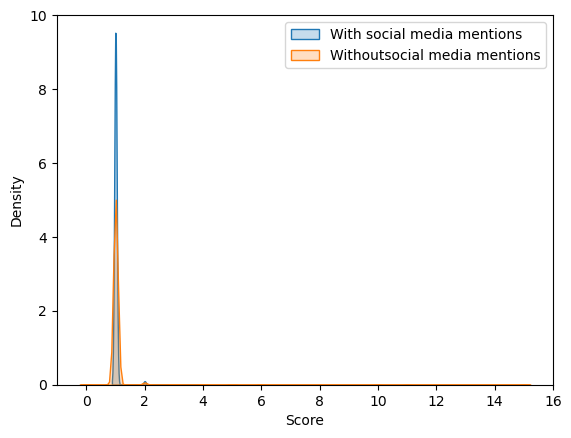

In [ ]:
import numpy as np
social_media_posts = post_df[post_df['social_media'] == 1]['score']
no_social_media_posts = post_df[post_df['social_media'] == 0]['score']
from scipy.stats import spearmanr, mannwhitneyu, kruskal
stat, p_value = mannwhitneyu(social_media_posts, no_social_media_posts)
print(f"Mann-Whitney U Test between groups with and without social media mentions: U-statistic={stat}, p-value={p_value}")




pooled_std = np.sqrt(((len(social_media_posts) - 1) * np.var(social_media_posts) + (len(no_social_media_posts) - 1) * np.var(no_social_media_posts)) / (len(social_media_posts) + len(no_social_media_posts) - 2))

cohen_d = (np.mean(social_media_posts) - np.mean(no_social_media_posts)) / pooled_std
hedges_g = cohen_d * (1 - 3 / (4 * (len(social_media_posts) + len(no_social_media_posts) - 3)))
print("Cohen's d:", cohen_d)
print("Hedges' g:", hedges_g)
# Visual inspection using box plots
plt.boxplot([social_media_posts, no_social_media_posts])

plt.ylabel('Score')

plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/2324sm01_score.png", bbox_inches='tight',format="png", dpi=800)
plt.show()
plt.show()

import seaborn as sns
import matplotlib.pyplot as plt
# Creating the density plot
#sns.kdeplot(scores, shade=True, label='Retained posts')
sns.kdeplot(social_media_posts, shade=True, label='With social media mentions')
sns.kdeplot(no_social_media_posts, shade=True, label='Withoutsocial media mentions')


# Adding labels and title
plt.xlabel('Score')
plt.ylabel('Density')


# Adding a legend
plt.legend()

# Displaying the density plot
#plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/2324KDEsm01_score.png", bbox_inches='tight',format="png", dpi=800)
plt.show()

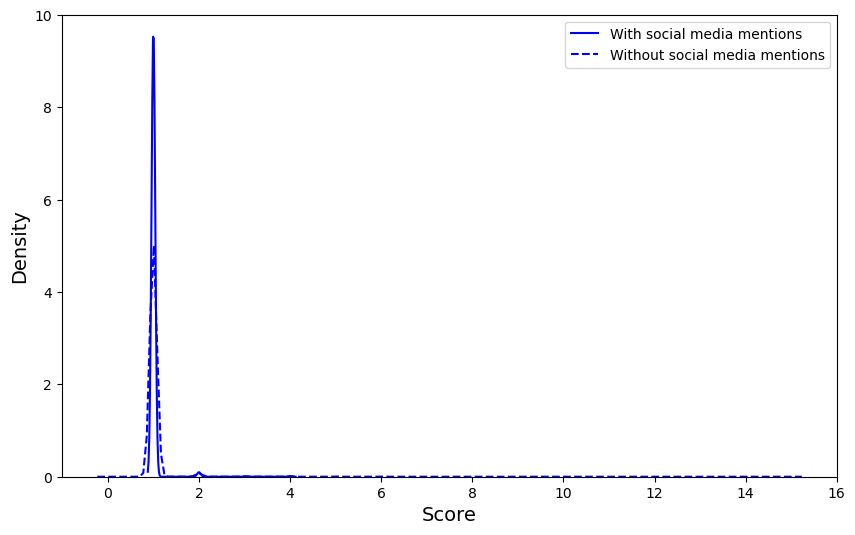

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create the density plot
plt.figure(figsize=(10, 6))

# Plotting density with dotted lines for both groups
sns.kdeplot(social_media_posts, label='With social media mentions', linestyle='-', color='blue')
sns.kdeplot(no_social_media_posts, label='Without social media mentions', linestyle='--', color='blue')

# Adding labels and title
plt.xlabel('Score',fontsize=14)
plt.ylabel('Density',fontsize=14)
#plt.title('Density Plot of Posts by Social Media Mention')

# Adding a legend
plt.legend()

# Show the plot
plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/2324KDE_score.png", bbox_inches='tight',format="png", dpi=800)
plt.show()

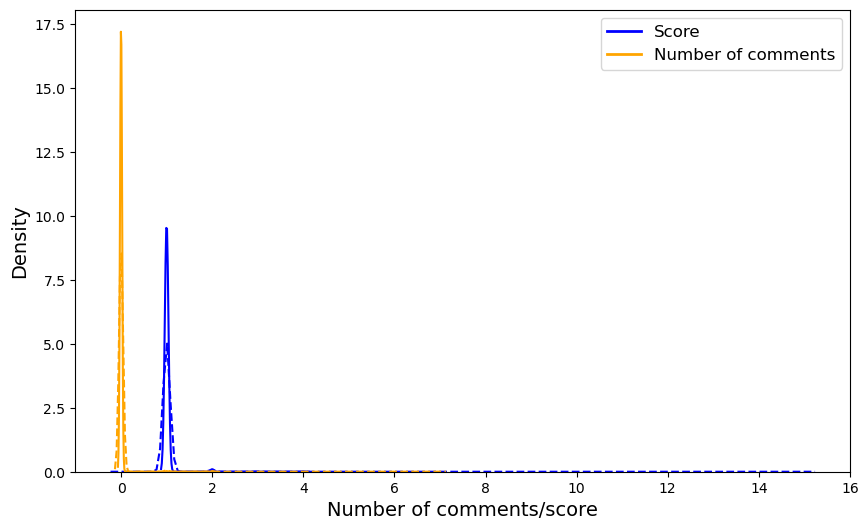

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# Create the density plot
plt.figure(figsize=(10, 6))

# Plotting density with different styles for both groups
sns.kdeplot(social_media_posts, label='With social media mentions', linestyle='-', color='blue')
sns.kdeplot(no_social_media_posts, label='Without social media mentions', linestyle='--', color='blue')
sns.kdeplot(social_media_posts_comments, label='With social media mentions', linestyle='-', color='orange')
sns.kdeplot(no_social_media_posts_comments, label='Without social media mentions', linestyle='--', color='orange')

# Adding labels and title
plt.xlabel('Number of comments/score', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Create custom legend
custom_lines = [
    Line2D([0], [0], color='blue', lw=2, linestyle='-'),  # Thick blue line for score
    Line2D([0], [0], color='orange', lw=2, linestyle='-')  # Thick orange line for number of comments
]

plt.legend(custom_lines, ['Score', 'Number of comments'], fontsize=12, loc='upper right')

# Show the plot
plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/2324KDE_score_comments.png", bbox_inches='tight',format="png", dpi=800)
plt.show()



# Username-extraction

In [ ]:
import pandas as pd
import re



#sm_post_df=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/social_media.csv")


# List of social media words
ssn_words = [
    "facebook", "fb", "instagram", "ig", "insta", "twitter", "tweet", "tw", "snapchat",
    "snap", "sc", "youtube", "yt", "tiktok", "tt", "linkedin", "pinterest", "pin",
    "whatsapp", "wa", "wechat", "tumblr", "telegram", "tele", "discord", "twitch", "medium",
    "quora", "vine", "happen", "onlyfans", "kik","only fans"
]

# Create columns for results
social_media['Contains_username'] = 0
social_media['Extracted_Word'] = ""

# This function uses a regular expression to check if the text contains any of the social media keywords
#followed by :, -, or is and then a username (a sequence of alphanumeric characters)

#exampple my kik is .....my kik:

def starts_with_at(text):
    matches = re.findall(r'@\s*\S+', text)
    if matches:
        return matches[0]
    return None


def check_reg(text):
    pattern = rf'(?i)\b(?:{"|".join(map(re.escape, ssn_words))})(?::|-| is)\s+(\w+)'
    matches = re.findall(pattern, text)
    if matches:
        return matches[0]
    return None


# Function to check for alphanumeric word
def check_alphanumeric(text):
    words = text.split()
    for word in words:
        pattern = r'\b(?=\w*\d)(?=\w*[a-zA-Z])\w+\b'
        if re.match(pattern, word):
            return word
    return None

# Check for Words with letters, numbers, underscore
def check_alpha_nonalpha(text):
    words = text.split()
    for word in words:
        pattern = r'\b(?=\w*[a-zA-Z])(?=\w*[_#])\w+\b'

        if re.match(pattern, word):
            return word
    return None



# This pattern is used to identify when one of the specified social media keywords
#(from specific_words) is surrounded by whitespace or punctuation, which could indicate that a username follows.
pattern = r'(?<=\[|\s|\:|\.)(' + '|'.join(specific_words) + r')(?=\]|\s|\:|\.)'



# Function to check for and exclude age/gender formats like "21f" or "38m"
def exclude_age_gender(word):
    # Match patterns like "21f", "38m", etc.
    if re.match(r'^\d{1,2}[fm]$', word.lower()):
        return False
    return True

for index, row in social_media.iterrows():
    sentence = row['merged']
    matches = re.findall(pattern, sentence, flags=re.IGNORECASE)

    for match in matches:
        # Work with the whole sentence instead of rest_of_sentence
        extracted_word = check_reg(sentence)
        if extracted_word and exclude_age_gender(extracted_word):
            social_media.at[index, 'Contains_username'] = 1
            social_media.at[index, 'Extracted_Word'] = extracted_word
            break

        extracted_word = check_alphanumeric(sentence)
        if extracted_word and exclude_age_gender(extracted_word):
            social_media.at[index, 'Contains_username'] = 1
            social_media.at[index, 'Extracted_Word'] = extracted_word
            break

        extracted_word = check_alpha_nonalpha(sentence)
        if extracted_word and exclude_age_gender(extracted_word):
            social_media.at[index, 'Contains_username'] = 1
            social_media.at[index, 'Extracted_Word'] = extracted_word
            break

        extracted_word_at = starts_with_at(sentence)
        if extracted_word_at and exclude_age_gender(extracted_word_at):
            social_media.at[index, 'Contains_username'] = 1
            social_media.at[index, 'Extracted_Word'] = extracted_word_at
            break


#print(sm_post_df.shape)
social_media.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/username@.csv")

Cohen's d: -0.01526503865153985
Hedges' g: -0.015248659854703434


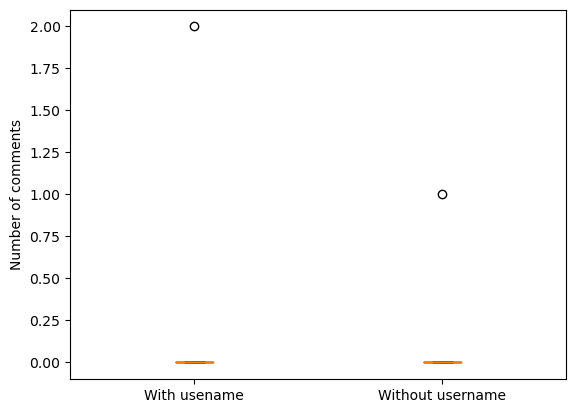

/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_55603/3762668540.py:30: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(social_media_posts, shade=True, label='With username')
/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_55603/3762668540.py:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_social_media_posts, shade=True, label='Without username')


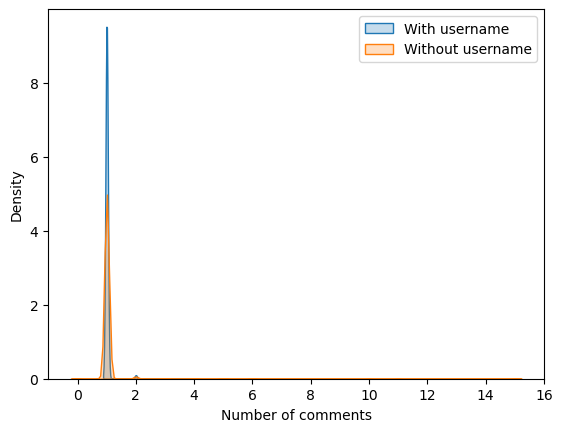

In [ ]:
username=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/username@.csv")

username.shape
#username=username[username['num_comments']<500]
username1 = username[username['Contains_username'] == 1]['num_comments']
username0= username[username['Contains_username'] == 0]['num_comments']

# Assuming 'social_media_posts' and 'no_social_media_posts' are your data
pooled_std = np.sqrt(((len(username1) - 1) * np.var(username1) + (len(username0) - 1) * np.var(username0)) / (len(username1) + len(username0) - 2))

cohen_d = (np.mean(username1) - np.mean(username0)) / pooled_std
hedges_g = cohen_d * (1 - 3 / (4 * (len(username1) + len(username0) - 3)))

print("Cohen's d:", cohen_d)
print("Hedges' g:", hedges_g)


plt.boxplot([username1, username0])
#plt.xlabel('Posts')
plt.ylabel('Number of comments')
plt.xticks([1, 2], ['With usename', 'Without username'])
#plt.title('Box Plot of Comment Distributions')
plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/2324username__comments.png", bbox_inches='tight',format="png", dpi=800)
plt.show()



# Creating the density plot
#sns.kdeplot(scores, shade=True, label='Retained posts')
sns.kdeplot(social_media_posts, shade=True, label='With username')
sns.kdeplot(no_social_media_posts, shade=True, label='Without username')


# Adding labels and title
plt.xlabel('Number of comments')
plt.ylabel('Density')
#plt.title('Distribution of Scores: Deleted vs Removed Posts')

# Adding a legend
plt.legend()

# Displaying the density plot
plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/2324KDEusername__comments.png", bbox_inches='tight',format="png", dpi=800)
plt.show()


Cohen's d: -0.11621638872468759
Hedges' g: -0.11609169302863107


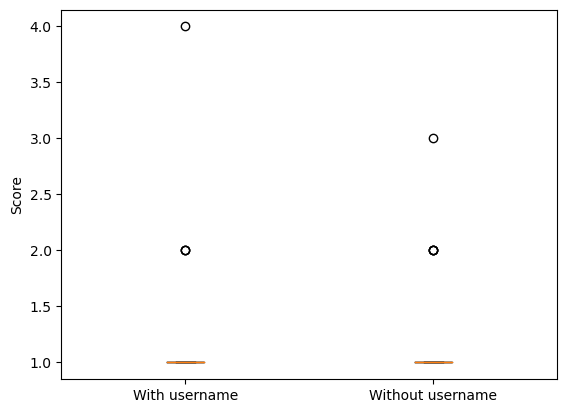

/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_55603/3283844585.py:26: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(social_media_posts, shade=True, label='With username')
/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_55603/3283844585.py:27: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_social_media_posts, shade=True, label='Without username')


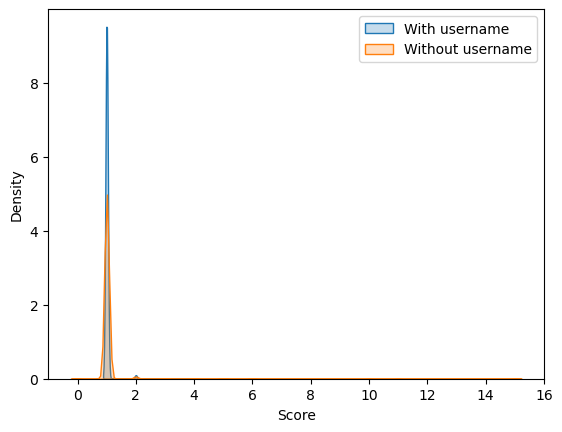

In [ ]:
username1 = username[username['Contains_username'] == 1]['score']
username0= username[username['Contains_username'] == 0]['score']

# Assuming 'social_media_posts' and 'no_social_media_posts' are your data
pooled_std = np.sqrt(((len(username1) - 1) * np.var(username1) + (len(username0) - 1) * np.var(username0)) / (len(username1) + len(username0) - 2))

cohen_d = (np.mean(username1) - np.mean(username0)) / pooled_std
hedges_g = cohen_d * (1 - 3 / (4 * (len(username1) + len(username0) - 3)))

print("Cohen's d:", cohen_d)
print("Hedges' g:", hedges_g)


plt.boxplot([username1, username0])
#plt.xlabel('Posts')
plt.ylabel('Score')
plt.xticks([1, 2], ['With username', 'Without username'])
#plt.title('Box Plot of Comment Distributions')
plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/2324username__score.png", bbox_inches='tight',format="png", dpi=800)
plt.show()



# Creating the density plot
#sns.kdeplot(scores, shade=True, label='Retained posts')
sns.kdeplot(social_media_posts, shade=True, label='With username')
sns.kdeplot(no_social_media_posts, shade=True, label='Without username')


# Adding labels and title
plt.xlabel('Score')
plt.ylabel('Density')
#plt.title('Distribution of Scores: Deleted vs Removed Posts')

# Adding a legend
plt.legend()

# Displaying the density plot
plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/2324KDEusername__score.png", bbox_inches='tight',format="png", dpi=800)
plt.show()


In [ ]:

check_alphanumeric("based in NZ, originally UK.Away for work at the moment so pretty frustrated,looking to chat with any females,couples or guys who like showing off their missus.Have a few pics of partner to swap.DM here,or message Mickster1987 on Kik/ Tele.Looking to discuss,trade etc")

'Mickster1987'

In [ ]:
count =social_media[social_media['Contains_username'] == 1].shape[0]
print(count)

401


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import words

# Download resources if not already downloaded
nltk.download('words')
nltk.download('averaged_perceptron_tagger')

# Social media platforms
social_media_list = [
    "facebook", "fb", "instagram", "ig", "insta", "twitter", "tweet", "tw", "snapchat",
    "snap", "sc", "youtube", "yt", "tiktok", "tt", "linkedin", "pinterest", "pin", "reddit",
    "whatsapp", "wa", "wechat", "tumblr", "telegram", "tele", "discord", "twitch", "medium",
    "quora", "vine", "happen", "onlyfans", "kik"
]

# Compile the regex pattern
pattern = re.compile(
    rf"(?i)\b({'|'.join(social_media_list)})\b(?![a-zA-Z])\s*(me|you|him|her|us|them|at|here)?\s*[:\-–—]?\s*(\w+)\b"
)

# English words dictionary
dictionary = set(words.words())


social_media=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/username@.csv")
# Exclude pronouns and other non-username tags
excluded_tags = ['PRP', 'PRP$', 'VB', 'VBP', 'VBZ', 'VBD', 'IN', 'DT']

# Function to check if the extracted word is likely a username
def is_username(word):
    if word.lower() not in dictionary:
        tokens = nltk.word_tokenize(word)
        pos_tags = nltk.pos_tag(tokens)
        if pos_tags[0][1] not in excluded_tags:
            return True
    return False

# Iterate through the DataFrame
for index, row in social_media.iterrows():
    if row['Contains_username'] == 0:
        # Find matches in the text
        matches = pattern.findall(row['merged'])
        #print(matches)
        for match in matches:
            platform, optional_word, extracted_word = match
            if is_username(extracted_word):
                social_media.at[index, 'Contains_username'] = 1
                social_media.at[index, 'Extracted_Word'] = extracted_word
                break  # Stop after finding the first valid username

# Display the updated DataFrame
#print(df)
sm_post_df_sorted = sm_post_df.sort_values(by='social_media')
social_media.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/username@.csv")

[nltk_data] Downloading package words to /Users/ss0128/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /Users/ss0128/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [ ]:
social_media_sorted = social_media.sort_values(by='Contains_username')
social_media_sorted.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/username.csv")

In [ ]:
count =social_media_sorted[social_media_sorted['Contains_username'] == 1].shape[0]
print(count)

510


In [ ]:
count = social_media_sorted[(social_media_sorted['social_media'] == 1) & (social_media_sorted['selftext'] == '[deleted]')].shape[0]
print(count)


4


In [ ]:
username=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/2324username@GPT4.csv")
username['Contains_username'] = username['username_gpt4'].apply(lambda x: 0 if x == 'None' else 1)
num_ones = username['Contains_username'].sum()
print("Number of rows with username (Contains_username=1):", num_ones)
print("percentage of rows with username (Contains_username=1):", num_ones/username.shape[0])

Number of rows with username (Contains_username=1): 533
percentage of rows with username (Contains_username=1): 0.7592592592592593


In [ ]:
username.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/2324username@GPT4.csv",index=False)


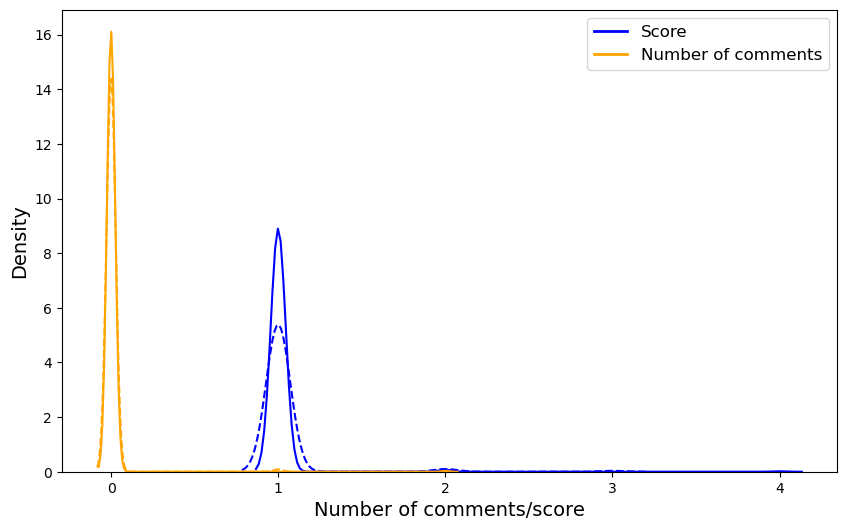

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
username1_comments = username[username['Contains_username'] == 1]['num_comments']
username0_comments= username[username['Contains_username'] == 0]['num_comments']
username1 = username[username['Contains_username'] == 1]['score']
username0= username[username['Contains_username'] == 0]['score']
# Create the density plot
plt.figure(figsize=(10, 6))

# Plotting density with different styles for both groups
sns.kdeplot(username1, label='With username', linestyle='-', color='blue')
sns.kdeplot(username0, label='Without username', linestyle='--', color='blue')
sns.kdeplot(username1_comments, label='With username', linestyle='-', color='orange')
sns.kdeplot(username0_comments, label='Without username', linestyle='--', color='orange')

# Adding labels and title
plt.xlabel('Number of comments/score', fontsize=14)
plt.ylabel('Density', fontsize=14)

# Create custom legend
custom_lines = [
    Line2D([0], [0], color='blue', lw=2, linestyle='-'),  # Thick blue line for score
    Line2D([0], [0], color='orange', lw=2, linestyle='-')  # Thick orange line for number of comments
]

plt.legend(custom_lines, ['Score', 'Number of comments'], fontsize=12, loc='upper right')

# Show the plot
plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/2324KDE_username_score_comments.png", bbox_inches='tight',format="png", dpi=800)
plt.show()



In [ ]:
direct_message=['dm', 'dms', 'inbox', 'message', 'msg', 'hmu', 'hit me up', 'ping',"same"]
dm_username = filter_df_by_words(username, direct_message)
# Print the filtered dataframe
print(dm_username.shape[0])

256


/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_20068/159638781.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  new_df = df[df['merged'].str.lower().str.contains(pattern)]


In [ ]:
no_username=username[username['Contains_username'] == 0]

In [ ]:
dm_username = filter_df_by_words(no_username, direct_message)
# Print the filtered dataframe
print(dm_username.shape[0]/no_username.shape[0])

0.46153846153846156


/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_20068/159638781.py:23: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  new_df = df[df['merged'].str.lower().str.contains(pattern)]


In [ ]:
def atsocial(text):
    # List of social media platforms
    social_media_list = [
        "facebook", "fb", "instagram", "ig", "insta", "twitter", "tweet", "tw", "snapchat",
        "snap", "sc", "youtube", "yt", "tiktok", "tt", "linkedin", "pinterest", "pin", "reddit",
        "whatsapp", "wa", "wechat", "tumblr", "telegram", "tele", "discord", "twitch", "medium",
        "quora", "vine", "happen", "onlyfans", "kik", "only fans"
    ]

    # Create a regex pattern to find any instance of @ surrounded by social media names
    social_media_pattern = '|'.join(social_media_list)
    pattern = rf"(\S+)\s*@\s*({social_media_pattern})|({social_media_pattern})\s*@\s*(\S+)"

    # Find all matches in the text
    matches = re.findall(pattern, text, flags=re.IGNORECASE)

    # Iterate through the matches and return the part that is not in the social media list
    for match in matches:
        # match is a tuple with 4 elements due to grouping, e.g., ('pik23', 'tele', '', '') or ('', '', 'tele', 'pik23')
        non_empty_elements = [elem for elem in match if elem]
        for elem in non_empty_elements:
            if elem.lower() not in social_media_list:
                return elem

    return None
print(atsocial("Tele. tele@#4goodtime"))

#4goodtime


In [ ]:
print(check_alphanumeric("I sell content üíû Telegram; lamarian_22"))

lamarian_22


In [ ]:
üòèüòè‚õΩÔ∏èüî•üî•

# Analysis around Trading



In [ ]:
import pandas as pd
import re

# Sample DataFrame
data = {
    'text': [
        "This is a sample text with special characters üòèüòè‚õΩÔ∏èüî•üî•.",
        "Another text without special characters.",
        "More text with strange symbols: üòè∏Ω.","üòç",
        "Ho and sy for you ÔÅä"
    ]
}

df = pd.DataFrame(data)

# Regular expression pattern to match special characters
# Adjust the pattern as needed to include or exclude specific characters
special_chars_pattern = r'[üòè‚õΩÔ∏•§îü§ôüèªÔÅäÄ¶üçëüçºüçºüèñ]'

def remove_special_chars(text):
    return re.sub(special_chars_pattern, '', text)

# Apply the function to each row in the DataFrame
df['filtered_text'] = df['text'].apply(remove_special_chars)

# Print the DataFrame to see the results
print(df['filtered_text'])


0    This is a sample text with special characters .
1           Another text without special characters.
2                  More text with strange symbols: .
3                                                   
4                                 Ho and sy for you 
Name: filtered_text, dtype: object


In [ ]:
p_df=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/Wife_dec22-feb23_duplicatedropped.csv")
p_df.shape

(4645, 37)

In [ ]:
import pandas as pd
import re

# # Sample DataFrame
# data = {
#     'text': [
#         "Hello 😊, this is a sample text with emojis 🌟 and symbols.",
#         "Another text with more emojis 😄🚀🎉.",
#         "No emojis here!",
#         "Mixed content: text and emojis 🎯🎈."
#     ]
# }

# df = pd.DataFrame(data)

# Regular expression pattern to match emojis
emoji_pattern = re.compile(
    # Matches a wide range of emojis including symbols, and flags
    "["  # Opening bracket
    "\U0001F600-\U0001F64F"  # Emoticons
    "\U0001F300-\U0001F5FF"  # Symbols & Pictographs
    "\U0001F680-\U0001F6FF"  # Transport & Map Symbols
    "\U0001F700-\U0001F77F"  # Alchemical Symbols
    "\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
    "\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
    "\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
    "\U0001FA00-\U0001FA6F"  # Chess Symbols
    "\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
    "\U00002700-\U000027BF"  # Dingbats
    "\U000024C2-\U0001F251"  # Enclosed Alphanumerics
    "\u200d"  # Zero Width Joiner
    "\u2640-\u2642"  # Gender Symbols
    "\u2600-\u26FF"  # Miscellaneous Symbols
    "\u2700-\u27BF"  # Dingbats
    "\u2300-\u23FF"  # Miscellaneous Technical
    "\u2B50"  # Star
    "\u2934-\u2935"  # Arrows
    "\u25AA-\u25AB"  # Squares
    "\u2B06"  # Upwards Arrow
    "\u2194"  # Left-Right Arrow
    "]", re.UNICODE
)

def remove_emojis(text):
    return emoji_pattern.sub('', text)

# Apply the function to each row in the DataFrame
#df['filtered_text'] = df['text'].apply(remove_emojis)
p_df['filtered_merged'] = p_df['merged'].apply(remove_emojis)

# Print the DataFrame to see the results
#print(df)


In [ ]:
p_df.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/Wife_dec22-feb23_duplicatedropped.csv")
p_df.shape

(4645, 38)

In [ ]:

post_df = p_df[p_df['filtered_merged'].str.strip() != '']

# Resetting the index after dropping rows, if needed
post_df = post_df.reset_index(drop=True)

In [ ]:
post_df=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/Wife_dec22-feb23_duplicatedropped.csv")
post_df.shape

(4607, 40)

In [ ]:
import pandas as pd
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet

# Make sure you have downloaded the wordnet data
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('punkt')

# Sample DataFrame


# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

# Function to lemmatize each word in a sentence
def lemmatize_text(text):
    words = word_tokenize(text)  # Tokenize the text into words
    lemmatized_words = [lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in words]  # Apply lemmatization
    return ' '.join(lemmatized_words)  # Reconstruct the sentence

# Helper function to map POS tag to WordNet POS tag
def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ, "N": wordnet.NOUN, "V": wordnet.VERB, "R": wordnet.ADV}
    return tag_dict.get(tag, wordnet.NOUN)

# Apply lemmatization to each row in the DataFrame
post_df['lemmatized_text'] = post_df['filtered_merged'].apply(lemmatize_text)



[nltk_data] Downloading package wordnet to /Users/ss0128/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /Users/ss0128/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt to /Users/ss0128/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
import re
def filter_tradedf_by_words_set_column(df, words):
    """Filters a DataFrame based on whether any of the specified words appear exactly in the 'text' column.

    Args:
        df: The input DataFrame.
        words: A list of words to search for.

    Returns:
        The modified DataFrame with a new column indicating whether any of the specified words are present (1) or absent (0).
    """

    # Convert words to lowercase for case-insensitive matching
    words = [re.escape(word.lower()) for word in words]

    # Create a regular expression pattern using word boundaries (\b) to prevent subword matches
    pattern = r"\b(" + "|".join(words) + r")\b"

    # Create a boolean mask for any of the words
    mask = df['lemmatized_text'].str.lower().str.contains(pattern)

    # Set the column value to 1 if any word is present, otherwise 0
    df['trading'] = mask.astype(int)

    return df
#'trade',"swap,"
# List of trading-related words
trading_words = [ 'trade',"swap","buy", "sell", "selling", "sale", "price", "cost", "deal", "purchase",
                 "fee", "free", "charge", "discount", "offer", "money", "cashapp", "pay", "apple pay", "chime",
                 "venmo", "dollar", "pound", "bank transfer", "bank", "PayPal", "Zelle", "Bitcoin",
                 "cryptocurrency", "card", "wire", "wallet", "$", "£"]

# Apply the filter function
post_df = filter_tradedf_by_words_set_column(post_df, trading_words)

# Check the results
print(post_df[['lemmatized_text', 'trading']])


                                        lemmatized_text  trading
0     Trading wife on tele/kik now kbeesa . Preferab...        0
1                                           fat as wife        0
2                   36 wife and hubby look for playmate        0
3                              My wife love to be share        0
4     Love military/cop wife but doesn ’ t have to b...        0
...                                                 ...      ...
4587  [ reddit ] I be tribbing your wife and gf nude...        0
4588                                      My 22y fiancé        0
4589                   jerk off to my girlfriend please        0
4590  ChatHey ! Here ’ s my wife suck her neighbor r...        0
4591  Hey cuck let me see your wife as in jean and t...        0

[4592 rows x 2 columns]


/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_20068/1222537250.py:20: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  mask = df['lemmatized_text'].str.lower().str.contains(pattern)


In [ ]:
post_df.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/Wife_dec22-feb23_duplicatedropped.csv")


In [ ]:
print(post_df[post_df['trading']==1].shape[0])
post_df[post_df['trading']==1].shape[0]/post_df.shape[0]

447


0.0973432055749129

In [ ]:
trade=post_df[post_df['trading']==1]
trade.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/Trade.csv")


In [ ]:
print(trade[(trade['selftext']=='[deleted]') | (trade['selftext']=='[removed]')].shape[0])
trade[(trade['selftext']=='[deleted]') | (trade['selftext']=='[removed]')].shape[0]/(post_df[(post_df['selftext']=='[deleted]') | (post_df['selftext']=='[removed]')].shape[0])

2


0.041666666666666664

In [ ]:
print(trade[(trade['selftext']!='[deleted]') & (trade['selftext']!='[removed]')].shape[0])
trade[(trade['selftext']!='[deleted]') & (trade['selftext']!='[removed]')].shape[0]/(post_df[(post_df['selftext']!='[deleted]') & (post_df['selftext']!='[removed]')].shape[0])

222


0.0488556338028169

In [ ]:
words = ["buy", "sell", "selling", "sale", "price", "cost", "shop", "business", "deal", "purchase",
                 "fee", "free", "charge", "discount", "offer", "money", "cashapp", "pay", "apple pay", "chime",
                 "venmo", "dollar", "pound", "bank transfer", "bank", "PayPal", "Zelle", "Bitcoin",
                 "cryptocurrency", "card", "wire", "wallet", "$", "£"]

# Initialize a dictionary to store word counts
word_counts = {}

# Iterate through each word and count occurrences in df['text']
for word in words:
    word_counts[word] = post_df['lemmatized_text'].str.lower().str.contains(word.lower()).sum()

# Convert the dictionary to a DataFrame to make it easy to read
word_count_df = pd.DataFrame(list(word_counts.items()), columns=['Word', 'Count'])

# Display the result
print(word_count_df)

              Word  Count
0              buy      6
1             sell     46
2          selling     34
3             sale     27
4            price      4
5             cost      0
6             shop      3
7         business      1
8             deal      5
9         purchase      0
10             fee     49
11            free     43
12          charge      0
13        discount      1
14           offer      5
15           money      3
16         cashapp      8
17             pay     17
18       apple pay      4
19           chime      4
20           venmo      3
21          dollar      0
22           pound     13
23   bank transfer      0
24            bank      0
25          PayPal      6
26           Zelle      0
27         Bitcoin      0
28  cryptocurrency      0
29            card      0
30            wire      0
31          wallet      0
32               $   4607
33               £      0


In [ ]:
import pandas as pd
import re

# Function to extract money amounts and symbols ($ or £)
def extract_money(text):
    # Regular expression pattern to match money amounts before or after $, £, or words like 'dollar' or 'pound'
    pattern = r'(\d+[\.,]?\d*\s*(?:\$|£|dollars?|pounds?)|\s*(?:\$|£)\s*\d+[\.,]?\d*)'

    # Find all matches in the text
    matches = re.findall(pattern, text, flags=re.IGNORECASE)

    # Join all the matches found and return
    return ', '.join(matches) if matches else None

# Apply the function to the text column
post_df['money'] = post_df['lemmatized_text'].apply(extract_money)

# Display the DataFrame with the new 'money' column
print(post_df[['lemmatized_text', 'money']])

                                        lemmatized_text money
0     Trading wife on tele/kik now kbeesa . Preferab...  None
1                                           fat as wife  None
2                   36 wife and hubby look for playmate  None
3                              My wife love to be share  None
4     Love military/cop wife but doesn ’ t have to b...  None
...                                                 ...   ...
4602  [ reddit ] I be tribbing your wife and gf nude...  None
4603                                      My 22y fiancé  None
4604                   jerk off to my girlfriend please  None
4605  ChatHey ! Here ’ s my wife suck her neighbor r...  None
4606  Hey cuck let me see your wife as in jean and t...  None

[4607 rows x 2 columns]


In [ ]:
df_filtered = post_df[post_df['money'].notna()]

# Display the filtered DataFrame
print(df_filtered[['lemmatized_text', 'money']])
df_filtered.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/Money_range.csv")
df_filtered.shape

                                        lemmatized_text               money
171   the first stranger for $ 100 I be allow to wat...               $ 100
686   Selling Teen Nudes ( 16-18 ) . No Trading . Dm...        $ 10,  $ 100
823                        2 $ tele link Pyt/Nl hmu $ $                 2 $
1769  SELLING - hmu i get teen/NL Megas $ 8 ( Proof ...                 $ 8
1826  Shared my Latina wife for the first timeMy wif...           230 pound
2299                    Selling her pack $ 5 or trading                 $ 5
2761  New pyt list available for $ 10 , be money rea...                $ 10
2778  SELLING T33N and NL megas $ 8 ( I will verify ...                 $ 8
3082  New pyt list available for $ 10 , be money rea...                $ 10
3213  I do TributesSend me pic of your wife . $ 5 co...   $ 5,  $ 10,  $ 20
3324                     2 $ telegram link Pyt/Nl dm me                 2 $
3432  🟠YNG/PYT/TEEN/ NL MEGAS FOR SALE ONLY $ 7- ( P...                 $ 7
3855  💎Pyt/N

(17, 38)

In [ ]:
tgroup1 = post_df[post_df['trading'] == 1]['num_comments']
tgroup2 = post_df[post_df['trading'] == 0]['num_comments']
trading_posts=tgroup1
no_trading_posts=tgroup2

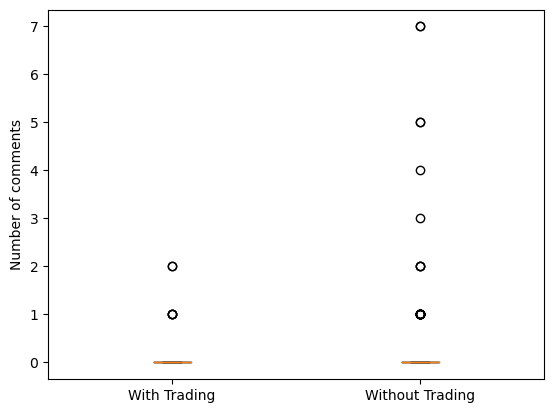

/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_55603/3981383962.py:12: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trading_posts, shade=True, label='With trading mentions')
/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_55603/3981383962.py:13: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_trading_posts, shade=True, label='Without trading mentions')


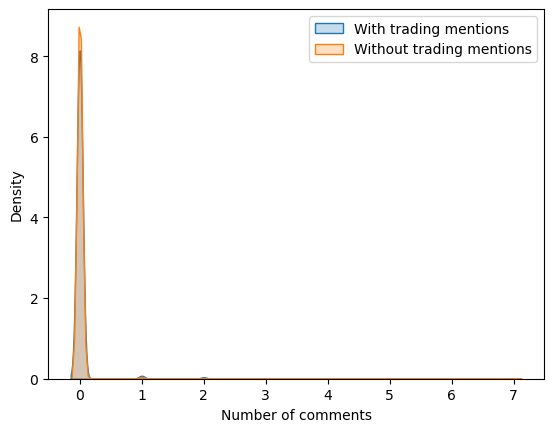

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
# Visual inspection using box plots

plt.boxplot([trading_posts, no_trading_posts])
plt.xticks([1, 2], ['With Trading', 'Without Trading'])
plt.ylabel('Number of comments')
#plt.title('Box Plot of Comment Distributions')
plt.show()
# Creating the density plot
#sns.kdeplot(scores, shade=True, label='Retained posts')
sns.kdeplot(trading_posts, shade=True, label='With trading mentions')
sns.kdeplot(no_trading_posts, shade=True, label='Without trading mentions')


# Adding labels and title
plt.xlabel('Number of comments')
plt.ylabel('Density')


# Adding a legend
plt.legend()

# Displaying the density plot
#plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/2324sm01KDE_comments.png", bbox_inches='tight',format="png", dpi=800)
plt.show()

In [ ]:
tgroup1 = post_df[post_df['trading'] == 1]['score']
tgroup2 = post_df[post_df['trading'] == 0]['score']
trading_posts=tgroup1
no_trading_posts=tgroup2

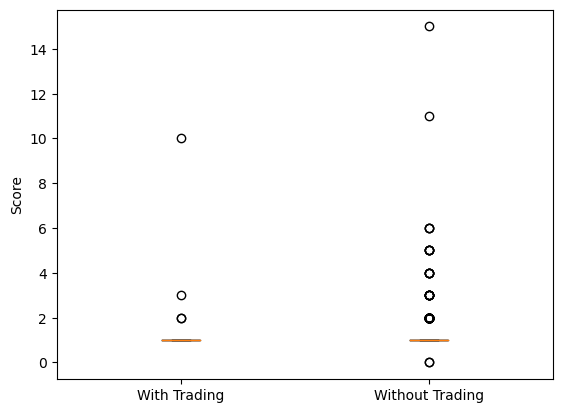

/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_55603/3910525039.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(trading_posts, shade=True, label='With trading mentions')
/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_55603/3910525039.py:9: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(no_trading_posts, shade=True, label='Without trading mentions')


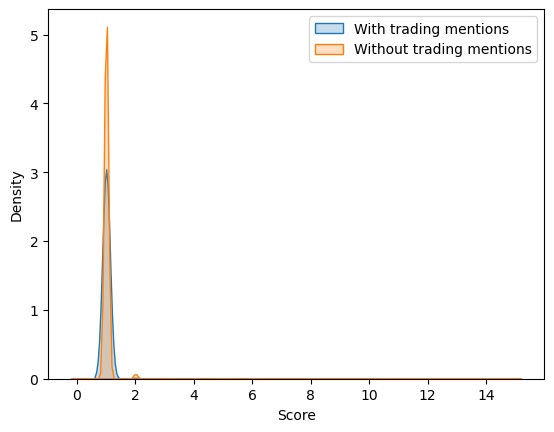

In [ ]:
plt.boxplot([trading_posts, no_trading_posts])
plt.xticks([1, 2], ['With Trading', 'Without Trading'])
plt.ylabel('Score')
#plt.title('Box Plot of Comment Distributions')
plt.show()
# Creating the density plot
#sns.kdeplot(scores, shade=True, label='Retained posts')
sns.kdeplot(trading_posts, shade=True, label='With trading mentions')
sns.kdeplot(no_trading_posts, shade=True, label='Without trading mentions')


# Adding labels and title
plt.xlabel('Score')
plt.ylabel('Density')


# Adding a legend
plt.legend()

# Displaying the density plot
#plt.savefig("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Figures/2324sm01KDE_comments.png", bbox_inches='tight',format="png", dpi=800)
plt.show()

# profanity Remove

In [ ]:
import pandas as pd

# Reading a .json file into a DataFrame
json_file_path = '/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/words.json'
df_json = pd.read_json(json_file_path)

print(df_json.head())  # Display the first few rows of the DataFrame
df_json.columns = ['Profane_words']
print(df_json.head())

               0
0  2 girls 1 cup
1           2g1c
2           4r5e
3           5h1t
4           5hit
   Profane_words
0  2 girls 1 cup
1           2g1c
2           4r5e
3           5h1t
4           5hit


In [ ]:
# Reading an unstructured .txt file into a DataFrame
txt_file_path = '/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/bad-words.txt'



In [ ]:
df_txt1 = pd.read_csv(txt_file_path, delimiter='\t')  # Specify the delimiter used in your .txt file
print(df_txt1.head())  # Display the first few rows of the DataFrame
print(df_txt1.shape[0])

  Profane_words
0          abbo
1           abo
2         abuse
3        addict
4         adult
652


In [ ]:
df_txt2 = pd.read_csv(txt_file_path, delimiter='\t')  # Specify the delimiter used in your .txt file

print(df_txt2.head())
print(df_txt2.shape[0])

  Profane_words
0          abbo
1           abo
2         abuse
3        addict
4         adult
652


In [ ]:
df_cmu = pd.read_csv('/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/CMU_profane_words_list.csv')

In [ ]:
df_en = pd.read_csv('/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/profanity_en.csv')

In [ ]:
import pandas as pd

# Assuming you have three DataFrames: df1, df2, and df3, each with a column 'profanity_words'

# Combine the profanity words from all three DataFrames into a single list
profanity_list = pd.concat([df_json['Profane_words'], df_txt1['Profane_words'], df_cmu['Profane_words'],df_en['Profane_words']])

# Convert the list to lowercase to standardize it
profanity_list = profanity_list.str.lower()

# Remove duplicates by converting the list to a set
profanity_set = set(profanity_list)

# Print the set of profanity words
print(profanity_set)


{'datnigga', 'limey', 'barfface', 'white trash', 'snot', 'penis', 'chonkys', 'ra8s', 'stupidfuck', 'rosypalmandherefivesisters', 'gang bang', 'choad', 'sleezeball', 'f@gging', 'ky', 'shlong', 'rectum', 'n0bhead', 'soused', 'shitbird', 'wetdream', 'gayest', 'thundercunt', 'fothermuckers', 'yellow showers', 'preteen', 'cocksucked ', 'slopeheads', 'fvckin', 'israel', 'b a s t a r d', 'how to kill', 'gay shit', 'peeenusss', 'shitass', 'fuckster', 'gyppie', 'gae', 'hitlerist', 'piss pig', 'hole', 'blue waffle', 'fuk', 'givehead', 'motherfuckka', 'pooper', 'sperm', 'pises', 'butchdike', 'ekrem', 'juggalo', 'sonna bitch', 'fucknut', 'jizjuice', 'shitd1ck', 'fker', 'nittit', 'waysted', 'l3i + ch', 'd1ldo', 'molest', 'burrheads', 's.o.b.s', 'bastinado', 'darkie', 'bi + ch', 'g@ylord', 'nastybitch', 'fuckme ', 'assfukah', 'klanswoman', 'dickslap', 'cocknugget', 'knobeds', 'payo', 'wog', 'pu$sy', 'klan', 'kwai lo', 'yourboobs', 'nig nog', 'motha fucka', 'molester', 'fuckboy', 'peinus', 'skankywho

In [ ]:
import pandas as pd
import re


# Function to remove profanity words
def remove_profanity(text):
    # Create a regular expression pattern to match the profanity words
    pattern = r'\b(' + '|'.join(map(re.escape, profanity_set)) + r')\b'

    # Use re.sub() to replace profanity words with an empty string
    filtered_text = re.sub(pattern, '', text, flags=re.IGNORECASE)

    # Return the filtered text, stripping extra spaces
    return ' '.join(filtered_text.split())

# Apply the function to the 'text' column
post_df['profane_filtered'] = post_df['filtered_merged'].apply(remove_profanity)

# Display the DataFrame with the new column



In [ ]:
post_df = post_df[post_df['profane_filtered'].str.strip() != '']

# Resetting the index after dropping rows, if needed
post_df = post_df.reset_index(drop=True)

In [ ]:
post_df.to_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/2023_24/Wife_dec22-feb23_profanedropped.csv")

/var/folders/t_/76y6hr856qd_zm_x3dcysgtc0000gp/T/ipykernel_9354/3296095405.py:1: DtypeWarning: Columns (7,13,21) have mixed types. Specify dtype option on import or set low_memory=False.
  Loc=pd.read_csv("/Users/ss0128/Library/CloudStorage/OneDrive-UniversityofSurrey/NSFW/Reddit_Datasets/Wife/Posts/Wife_post_location_web_trf.csv")


In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import re

cleaned_text = ' '.join(post_df['profane_filtered'])

# Step 1: Preprocess the text
# Remove special characters and numbers
#cleaned_text = re.sub(r'[^a-zA-Z\s]', '', text)

# Step 2: Convert text into a document-term matrix
# Step 2: Convert text into a document-term matrix
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform([cleaned_text])

# Step 3: Apply LDA with adjusted learning_decay and learning_offset
num_topics = 3  # Specify number of topics
lda = LatentDirichletAllocation(
    n_components=num_topics,
    learning_decay=0.1,     # Adjusted learning_decay
    learning_offset=100.0,   # Adjusted learning_offset
    random_state=0
)
lda.fit(X)

# Step 4: Examine the topics
feature_names = vectorizer.get_feature_names_out()

def display_topics(model, feature_names, no_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx + 1}:")
        print(" | ".join([feature_names[i] for i in topic.argsort()[:-no_top_words - 1:-1]]))
        print("\n")

display_topics(lda, feature_names, 20)


Topic 1:
κικ | intimate | jack | ive | isnt | irlnudes | ios | involviert | invited | internet | hockey | interests | interestedi | instent | inspiration | inspect | insatiable | inquiries | jack649 | jackson


Topic 2:
wife | dm | gf | want | trade | like | tele | send | looking | pics | kik | love | tribute | wants | telegram | doing | trib | share | let | think


Topic 3:
κικ | intimate | jack | ive | isnt | irlnudes | ios | involviert | invited | internet | hockey | interests | interestedi | instent | inspiration | inspect | insatiable | inquiries | jack649 | jackson




In [ ]:
print(cleaned_text)

Trading wife on tele/kik now kbeesa. Preferably for women. But never turn a lady down wife 36 wife and hubby looking for playmate My wife loves to be shared Love military/cop wives but doesn’t have to be!!! No ! clothed pic w/ face to start. Snap/tele/Kik jasonkyle221 Wife said I needed to post this one! Anyone else like it? trading 21yrold Doing 1 trib hmu. 18+ plz Not a secret anymore! sharing the wife My wife loves younger men. She's 57 Starting a group on telegram so we can share pics and vids of our wife’s. Hit me up with a sample on telegram @phlydaddy First time posting (at hubby’s request). or nah Couples interest level? Here I am stretching my last hotwife, she loved my thick white pole! Ex athlete freak! ready to empty these big in your trophy wife! Mmf or let me take her deep alone? Kik williethekidd_1 Her favorite activity and my favorite view vi piace così? and for you Add me on telegram cutcock27 if you can't find me DM me your username send me your wife or any more extre